# Exploratory Data Analysis of Severe Injury recorded by OSHA between  January 2015 - July 2021

In [2]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# reading the csv file
si = pd.read_csv(r"C:\Users\AYOTUNDE DOHERTY\Desktop\UTIVA_DSF\SevereInjuryReport.csv", low_memory = False)

In [4]:
# checking the shape of the data
print(f'The shape of the data is {si.shape}')

The shape of the data is (66699, 26)


In [5]:
# viewing the first five rows
si.head()

,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,...,Nature,NatureTitle,Partof Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title
0,2015010015,931176,1/1/2015,FCI Otisville Federal Correctional Institution,Two Mile Drive,NaN,OTISVILLE,NEW YORK,10963.0,41.46,...,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,5772.0,Inmate or detainee in custody
1,2015010016,930267,1/1/2015,Kalahari Manufacturing LLC,171 Progress Drive,NaN,LAKE DELTON,WISCONSIN,53940.0,43.59,...,1522,Second degree heat (thermal) burns,519,"Leg(s), n.e.c.",317,"Ignition of vapors, gases, or liquids",7261,"Welding, cutting, and blow torches",NaN,NaN
2,2015010018,929823,1/1/2015,Schneider National Bulk Carrier,420 CORAOPOLIS ROAD,NaN,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,...,10,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,4331,Other fall to lower level less than 6 feet,8421,"Semi, tractor-trailer, tanker truck",741.0,Ladders-fixed
3,2015010019,929711,1/1/2015,PEPSI BOTTLING GROUP INC.,4541 HOUSTON AVE.,NaN,MACON,GEORGIA,31206.0,32.77,...,1972,"Soreness, pain, hurt-nonspecified injury",510,"Leg(s), unspecified",640,Caught in or compressed by equipment or object...,8623,Pallet jack-powered,8420.0,"Truck-motorized freight hauling and utility, u..."
4,2015010020,929642,1/1/2015,North American Pipe Corporation,210 South Arch Street,NaN,JANESVILLE,WISCONSIN,53545.0,42.67,...,111,Fractures,4429,"Finger(s), fingernail(s), n.e.c.",6411,Caught in running equipment or machinery durin...,350,"Metal, woodworking, and special material machi...",NaN,NaN


### Data Cleaning

In [6]:
# changing the python object event Date to datetime data type
si['EventDate'] = pd.to_datetime(si['EventDate'])

In [7]:
# creating a new column Year off the Event date column
si['Year'] = pd.DatetimeIndex(si['EventDate']).year

In [8]:
# checking the data type of the Event date
si['EventDate'].dtype

dtype('<M8[ns]')

In [9]:
# calling the year column
si['EventDate']

0       2015-01-01
1       2015-01-01
2       2015-01-01
3       2015-01-01
4       2015-01-01
           ...    
66694   2021-07-31
66695   2021-07-31
66696   2021-07-31
66697   2021-07-31
66698   2021-07-31
Name: EventDate, Length: 66699, dtype: datetime64[ns]

In [10]:
# calling the data frame
si

,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,...,NatureTitle,Partof Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title,Year
0,2015010015,931176,2015-01-01,FCI Otisville Federal Correctional Institution,Two Mile Drive,NaN,OTISVILLE,NEW YORK,10963.0,41.46,...,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,5772.0,Inmate or detainee in custody,2015
1,2015010016,930267,2015-01-01,Kalahari Manufacturing LLC,171 Progress Drive,NaN,LAKE DELTON,WISCONSIN,53940.0,43.59,...,Second degree heat (thermal) burns,519,"Leg(s), n.e.c.",317,"Ignition of vapors, gases, or liquids",7261,"Welding, cutting, and blow torches",NaN,NaN,2015
2,2015010018,929823,2015-01-01,Schneider National Bulk Carrier,420 CORAOPOLIS ROAD,NaN,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,...,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,4331,Other fall to lower level less than 6 feet,8421,"Semi, tractor-trailer, tanker truck",741.0,Ladders-fixed,2015
3,2015010019,929711,2015-01-01,PEPSI BOTTLING GROUP INC.,4541 HOUSTON AVE.,NaN,MACON,GEORGIA,31206.0,32.77,...,"Soreness, pain, hurt-nonspecified injury",510,"Leg(s), unspecified",640,Caught in or compressed by equipment or object...,8623,Pallet jack-powered,8420.0,"Truck-motorized freight hauling and utility, u...",2015
4,2015010020,929642,2015-01-01,North American Pipe Corporation,210 South Arch Street,NaN,JANESVILLE,WISCONSIN,53545.0,42.67,...,Fractures,4429,"Finger(s), fingernail(s), n.e.c.",6411,Caught in running equipment or machinery durin...,350,"Metal, woodworking, and special material machi...",NaN,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66694,2021076378,1792782,2021-07-31,VIRGINIA INTERNATIONAL TERMINALS INC.,1000 Virginia International Gateway Blvd.,onboard Richmond Express Barge,PORTSMOUTH,VA,23703.0,36.83,...,Fractures,52,Ankle(s),258,Fall on water vehicle,831,Barge,NaN,NaN,2021
66695,2021076379,1792920,2021-07-31,Cedar Grove Warehousing LLC,802 South Street,NaN,PLYMOUTH,WI,53073.0,43.73,...,Fractures,41,"Shoulder(s), including clavicle(s), scapula(e)",4330,"Other fall to lower level, unspecified",7422,Step ladders,6629.0,"Floor, n.e.c.",2021
66696,2021076380,1793602,2021-07-31,MVP PLUMBING CORP.,1040 Renwick Road,NaN,ROMEOVILLE,IL,60446.0,41.59,...,"Cuts, lacerations",20,"Neck, except internal location of diseases or ...",6252,Injured by slipping or swinging object held by...,7224,"Saws-powered, except chainsaws",NaN,NaN,2021
66697,2021076384,1792936,2021-07-31,"Agropur, Inc.",408 Dakota Street,NaN,LAKE NORDEN,SD,57248.0,44.58,...,"Electrocutions, electric shocks",6,BODY SYSTEMS,5112,"Direct exposure to electricity, greater than 2...",4417,"Switchboards, switches, fuses",NaN,NaN,2021


In [11]:
# checking for the description
si.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,66699.0,5.006493e+09,6.734539e+09,2.015010e+09,2.016098e+09,2.018088e+09,2.020099e+09,2.020121e+10
UPA,66699.0,1.332353e+06,2.347145e+05,8.674120e+05,1.133342e+06,1.328454e+06,1.505028e+06,1.834899e+06
Zip,66680.0,4.736346e+04,2.512445e+04,7.160000e+02,3.029700e+04,4.501400e+04,7.237000e+04,9.992600e+04
Latitude,66664.0,3.664966e+01,5.550877e+00,-3.492000e+01,3.206750e+01,3.873000e+01,4.106000e+01,7.034000e+01
Longitude,66664.0,-8.764315e+01,1.177851e+01,-1.707100e+02,-9.550000e+01,-8.761000e+01,-8.053000e+01,1.666400e+02
Hospitalized,66699.0,8.137753e-01,4.074316e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00
Amputation,66694.0,2.631121e-01,4.408025e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
Inspection,22436.0,1.293069e+06,1.499845e+05,8.371470e+05,1.164879e+06,1.298204e+06,1.422630e+06,1.565874e+06
Nature,66699.0,8.463578e+02,7.602751e+02,7.000000e+00,1.110000e+02,1.231000e+03,1.311000e+03,9.999000e+03
Partof Body,66699.0,2.077700e+03,2.584188e+03,6.000000e+00,3.100000e+02,5.120000e+02,4.422000e+03,9.999000e+03


In [12]:
# checking the information of the dataset
si.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66699 entries, 0 to 66698
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      66699 non-null  int64         
 1   UPA                     66699 non-null  int64         
 2   EventDate               66699 non-null  datetime64[ns]
 3   Employer                66699 non-null  object        
 4   Address1                66683 non-null  object        
 5   Address2                6108 non-null   object        
 6   City                    66684 non-null  object        
 7   State                   66699 non-null  object        
 8   Zip                     66680 non-null  float64       
 9   Latitude                66664 non-null  float64       
 10  Longitude               66664 non-null  float64       
 11  Primary NAICS           66697 non-null  object        
 12  Hospitalized            66699 non-null  int64 

In [13]:
# checking for null values
si.isnull().sum()

ID                            0
UPA                           0
EventDate                     0
Employer                      0
Address1                     16
Address2                  60591
City                         15
State                         0
Zip                          19
Latitude                     35
Longitude                    35
Primary NAICS                 2
Hospitalized                  0
Amputation                    5
Inspection                44263
Final Narrative               0
Nature                        0
NatureTitle                   0
Partof Body                   0
Part of Body Title            0
Event                         0
EventTitle                    0
Source                        0
SourceTitle                   0
Secondary Source          43581
Secondary Source Title    43581
Year                          0
dtype: int64

In [14]:
# checking for mean null values
si.isnull().mean()

ID                        0.000000
UPA                       0.000000
EventDate                 0.000000
Employer                  0.000000
Address1                  0.000240
Address2                  0.908424
City                      0.000225
State                     0.000000
Zip                       0.000285
Latitude                  0.000525
Longitude                 0.000525
Primary NAICS             0.000030
Hospitalized              0.000000
Amputation                0.000075
Inspection                0.663623
Final Narrative           0.000000
Nature                    0.000000
NatureTitle               0.000000
Partof Body               0.000000
Part of Body Title        0.000000
Event                     0.000000
EventTitle                0.000000
Source                    0.000000
SourceTitle               0.000000
Secondary Source          0.653398
Secondary Source Title    0.653398
Year                      0.000000
dtype: float64

In [15]:
# checking for mean  % null values
si.isnull().mean() * 100.0

ID                         0.000000
UPA                        0.000000
EventDate                  0.000000
Employer                   0.000000
Address1                   0.023988
Address2                  90.842441
City                       0.022489
State                      0.000000
Zip                        0.028486
Latitude                   0.052475
Longitude                  0.052475
Primary NAICS              0.002999
Hospitalized               0.000000
Amputation                 0.007496
Inspection                66.362314
Final Narrative            0.000000
Nature                     0.000000
NatureTitle                0.000000
Partof Body                0.000000
Part of Body Title         0.000000
Event                      0.000000
EventTitle                 0.000000
Source                     0.000000
SourceTitle                0.000000
Secondary Source          65.339810
Secondary Source Title    65.339810
Year                       0.000000
dtype: float64

In [16]:
#dropping the columns with null values above 40% 
si.drop(['Address2', 'Secondary Source', 'Inspection', 'Secondary Source Title'], 1, inplace = True )


In [17]:
# changing the ID data type numeric to category
si['ID'] = pd.Categorical(si['ID'])

In [18]:
# spliting colums into numerical and categorical columns
cat_col = [col for col in si.columns if si[col].dtype == 'object']
num_col = [col for col in si.columns if si[col].dtype != 'object']

In [19]:
# calling the categorical columns
cat_col

['Employer',
 'Address1',
 'City',
 'State',
 'Primary NAICS',
 'Final Narrative',
 'NatureTitle',
 'Part of Body Title',
 'EventTitle',
 'SourceTitle']

In [20]:
# calling the numerical columns
num_col

['ID',
 'UPA',
 'EventDate',
 'Zip',
 'Latitude',
 'Longitude',
 'Hospitalized',
 'Amputation',
 'Nature',
 'Partof Body',
 'Event',
 'Source',
 'Year']

In [21]:
# dropping the Zip, latitude, longitude,Nature, Part of body, Event, Sources Columns
si.drop(['Zip', 'Latitude', 'Longitude', 'Nature', 'Partof Body'], axis = 1, inplace = True)

In [22]:
# viewing the last 5 rows
si.tail()

,ID,UPA,EventDate,Employer,Address1,City,State,Primary NAICS,Hospitalized,Amputation,Final Narrative,NatureTitle,Part of Body Title,Event,EventTitle,Source,SourceTitle,Year
66694,2021076378,1792782,2021-07-31,VIRGINIA INTERNATIONAL TERMINALS INC.,1000 Virginia International Gateway Blvd.,PORTSMOUTH,VA,488320,1,0.0,An employee was using an extension ladder whil...,Fractures,Ankle(s),258,Fall on water vehicle,831,Barge,2021
66695,2021076379,1792920,2021-07-31,Cedar Grove Warehousing LLC,802 South Street,PLYMOUTH,WI,493120,1,0.0,An employee was swinging a hammer while on a 6...,Fractures,"Shoulder(s), including clavicle(s), scapula(e)",4330,"Other fall to lower level, unspecified",7422,Step ladders,2021
66696,2021076380,1793602,2021-07-31,MVP PLUMBING CORP.,1040 Renwick Road,ROMEOVILLE,IL,237110,1,0.0,"On July 31, 2021, at 11:30 a.m., an employee w...","Cuts, lacerations","Neck, except internal location of diseases or ...",6252,Injured by slipping or swinging object held by...,7224,"Saws-powered, except chainsaws",2021
66697,2021076384,1792936,2021-07-31,"Agropur, Inc.",408 Dakota Street,LAKE NORDEN,SD,311513,1,0.0,An employee accessed an electrical panel to sw...,"Electrocutions, electric shocks",BODY SYSTEMS,5112,"Direct exposure to electricity, greater than 2...",4417,"Switchboards, switches, fuses",2021
66698,2021076402,1792699,2021-07-31,The Lowell General Hospital,1 Hospital Drive,LOWELL,MA,622110,1,0.0,A nurse was sitting at a nurse's station. A pa...,"Intracranial injuries, unspecified",Brain,1113,"Hitting, kicking, beating, shoving",574,Patient,2021


### Exploratory Data Analysis

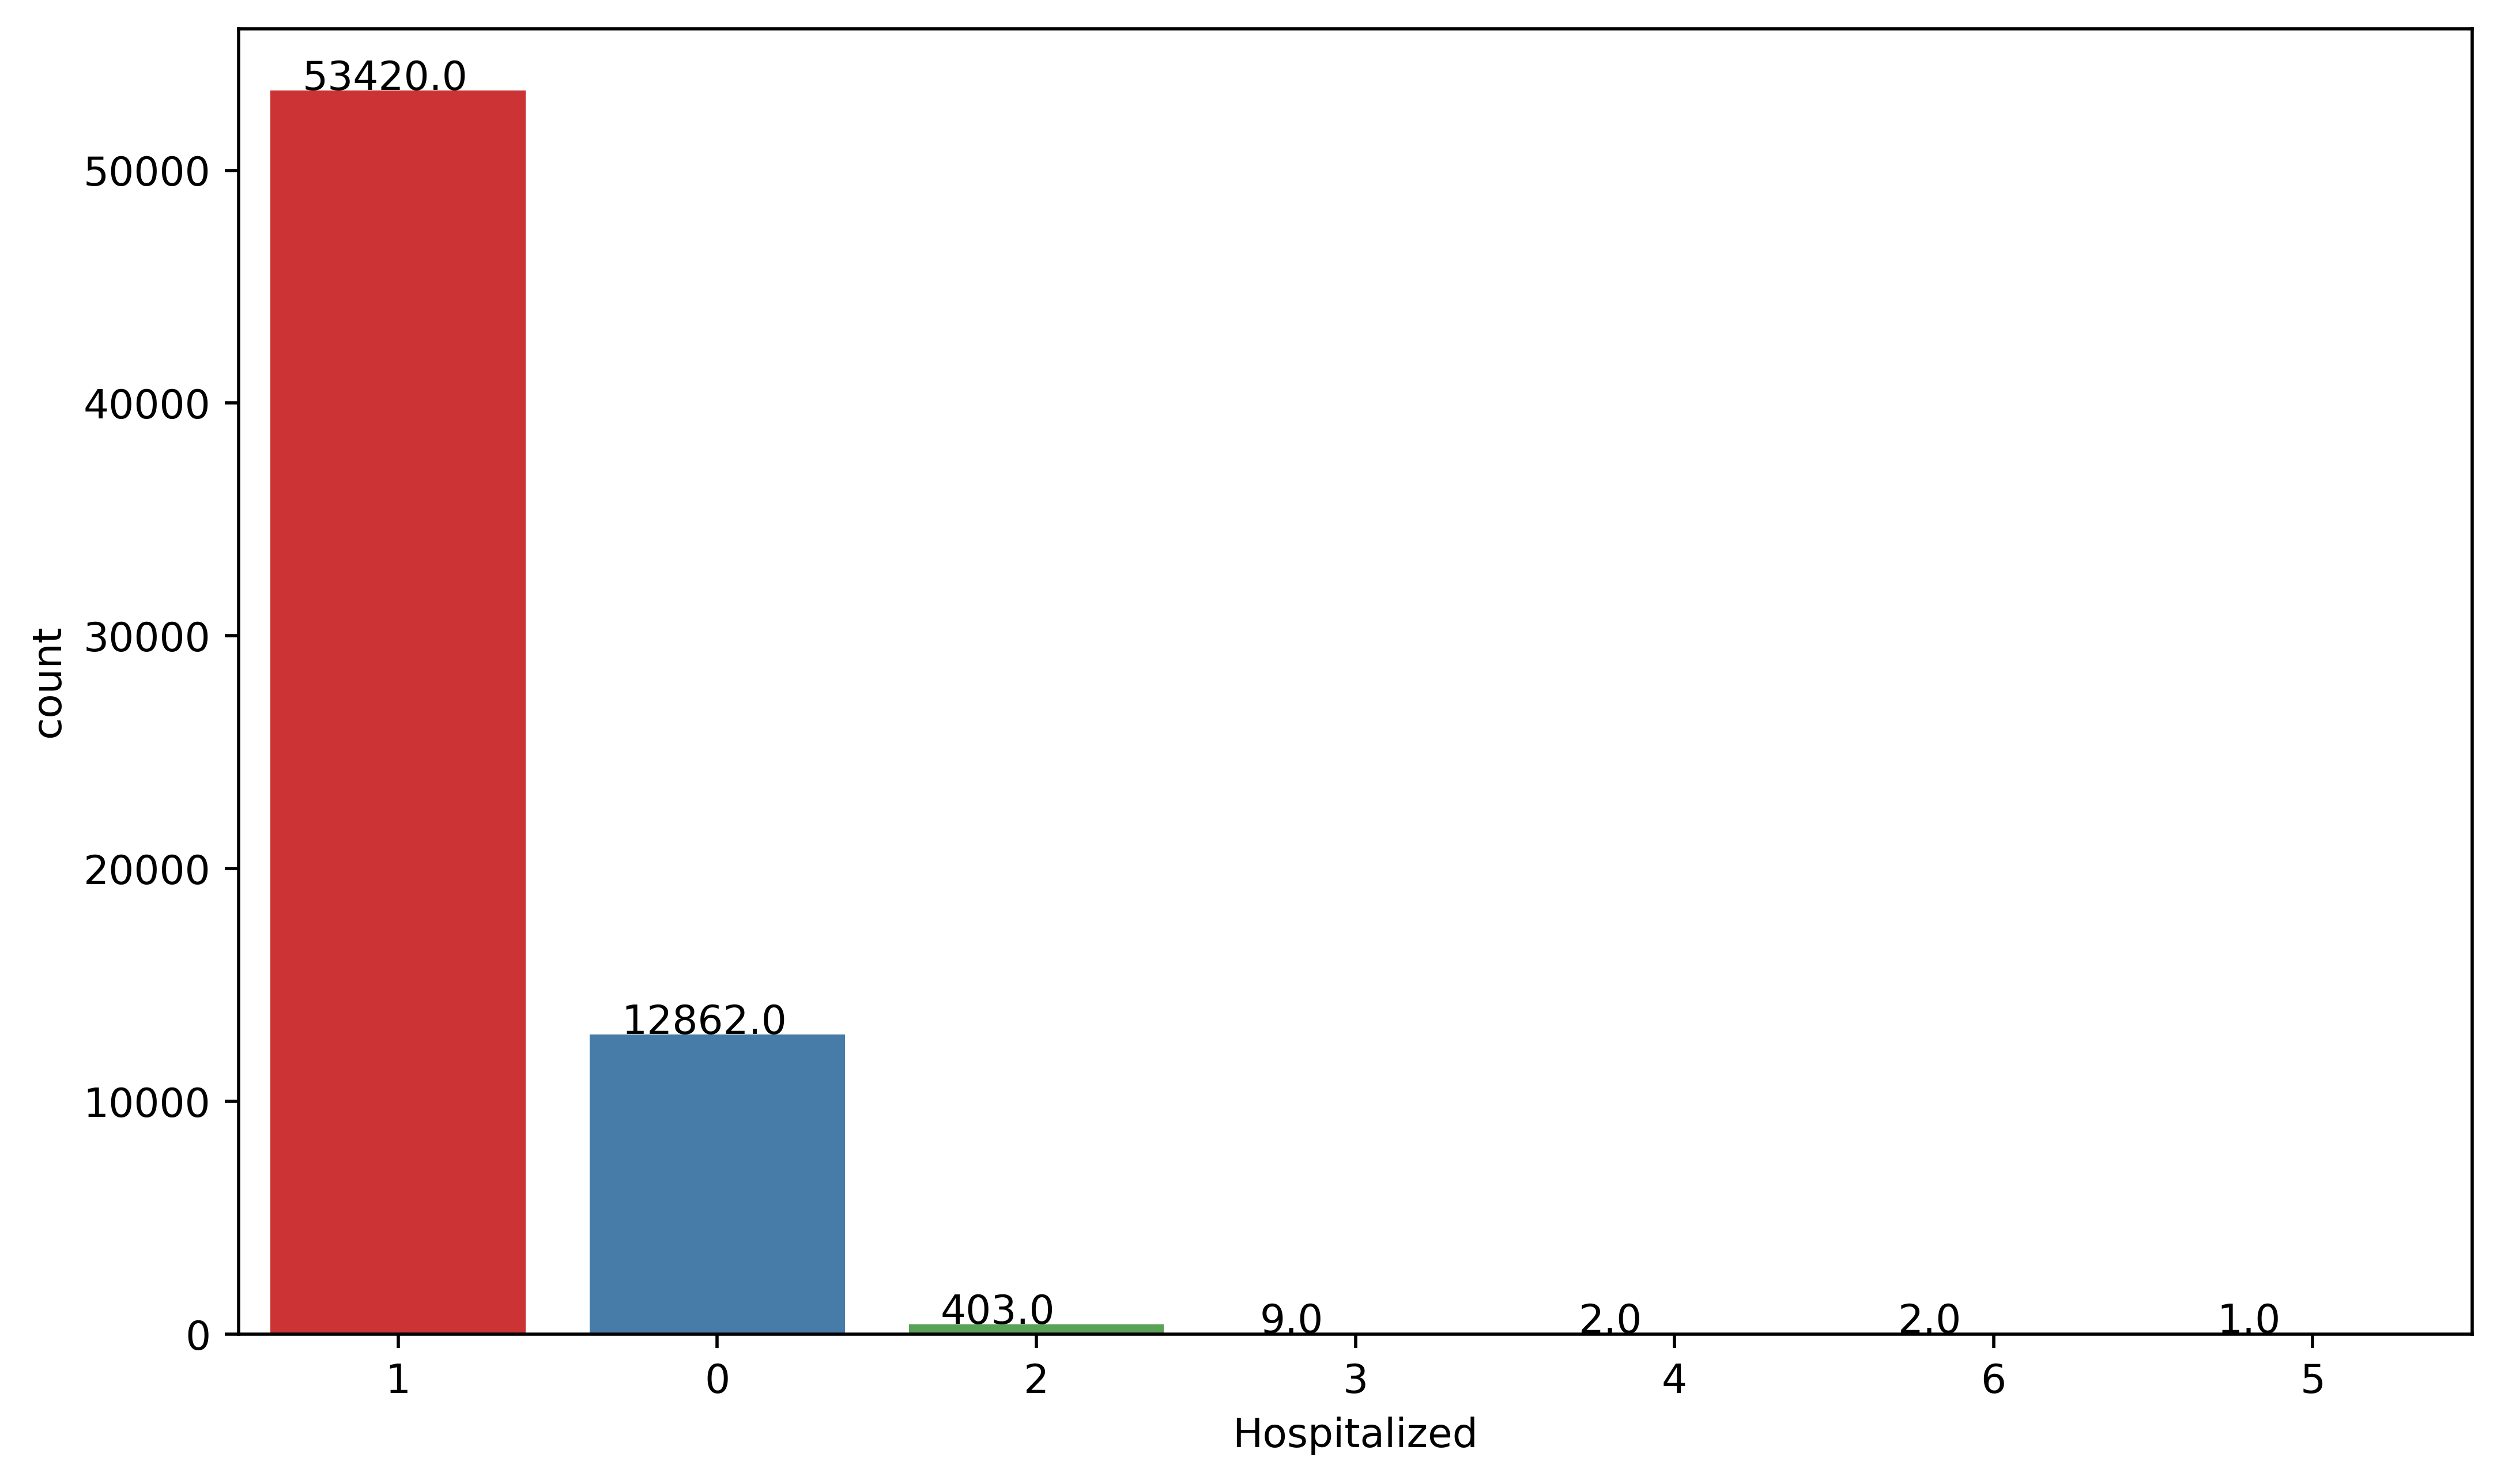

In [23]:
plt.figure(figsize =(10,6), dpi =500)
ax = sns.countplot(x = 'Hospitalized', data = si, 
                   order=si['Hospitalized'].value_counts(ascending=False).index, palette = 'Set1');
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))


From the above visuals, we have cases of severe injuries where there were no hospitalized victims, the highest recorded 
hospitalized victims as a result of severe injury was six with an occurence of two, finally record of one
hospitalized victim has the highest number of occurence with a record of 53,420

In [24]:
# checking the occurence of number hospitalized as a result of severe injury
si['Hospitalized'].value_counts()

1    53420
0    12862
2      403
3        9
4        2
6        2
5        1
Name: Hospitalized, dtype: int64

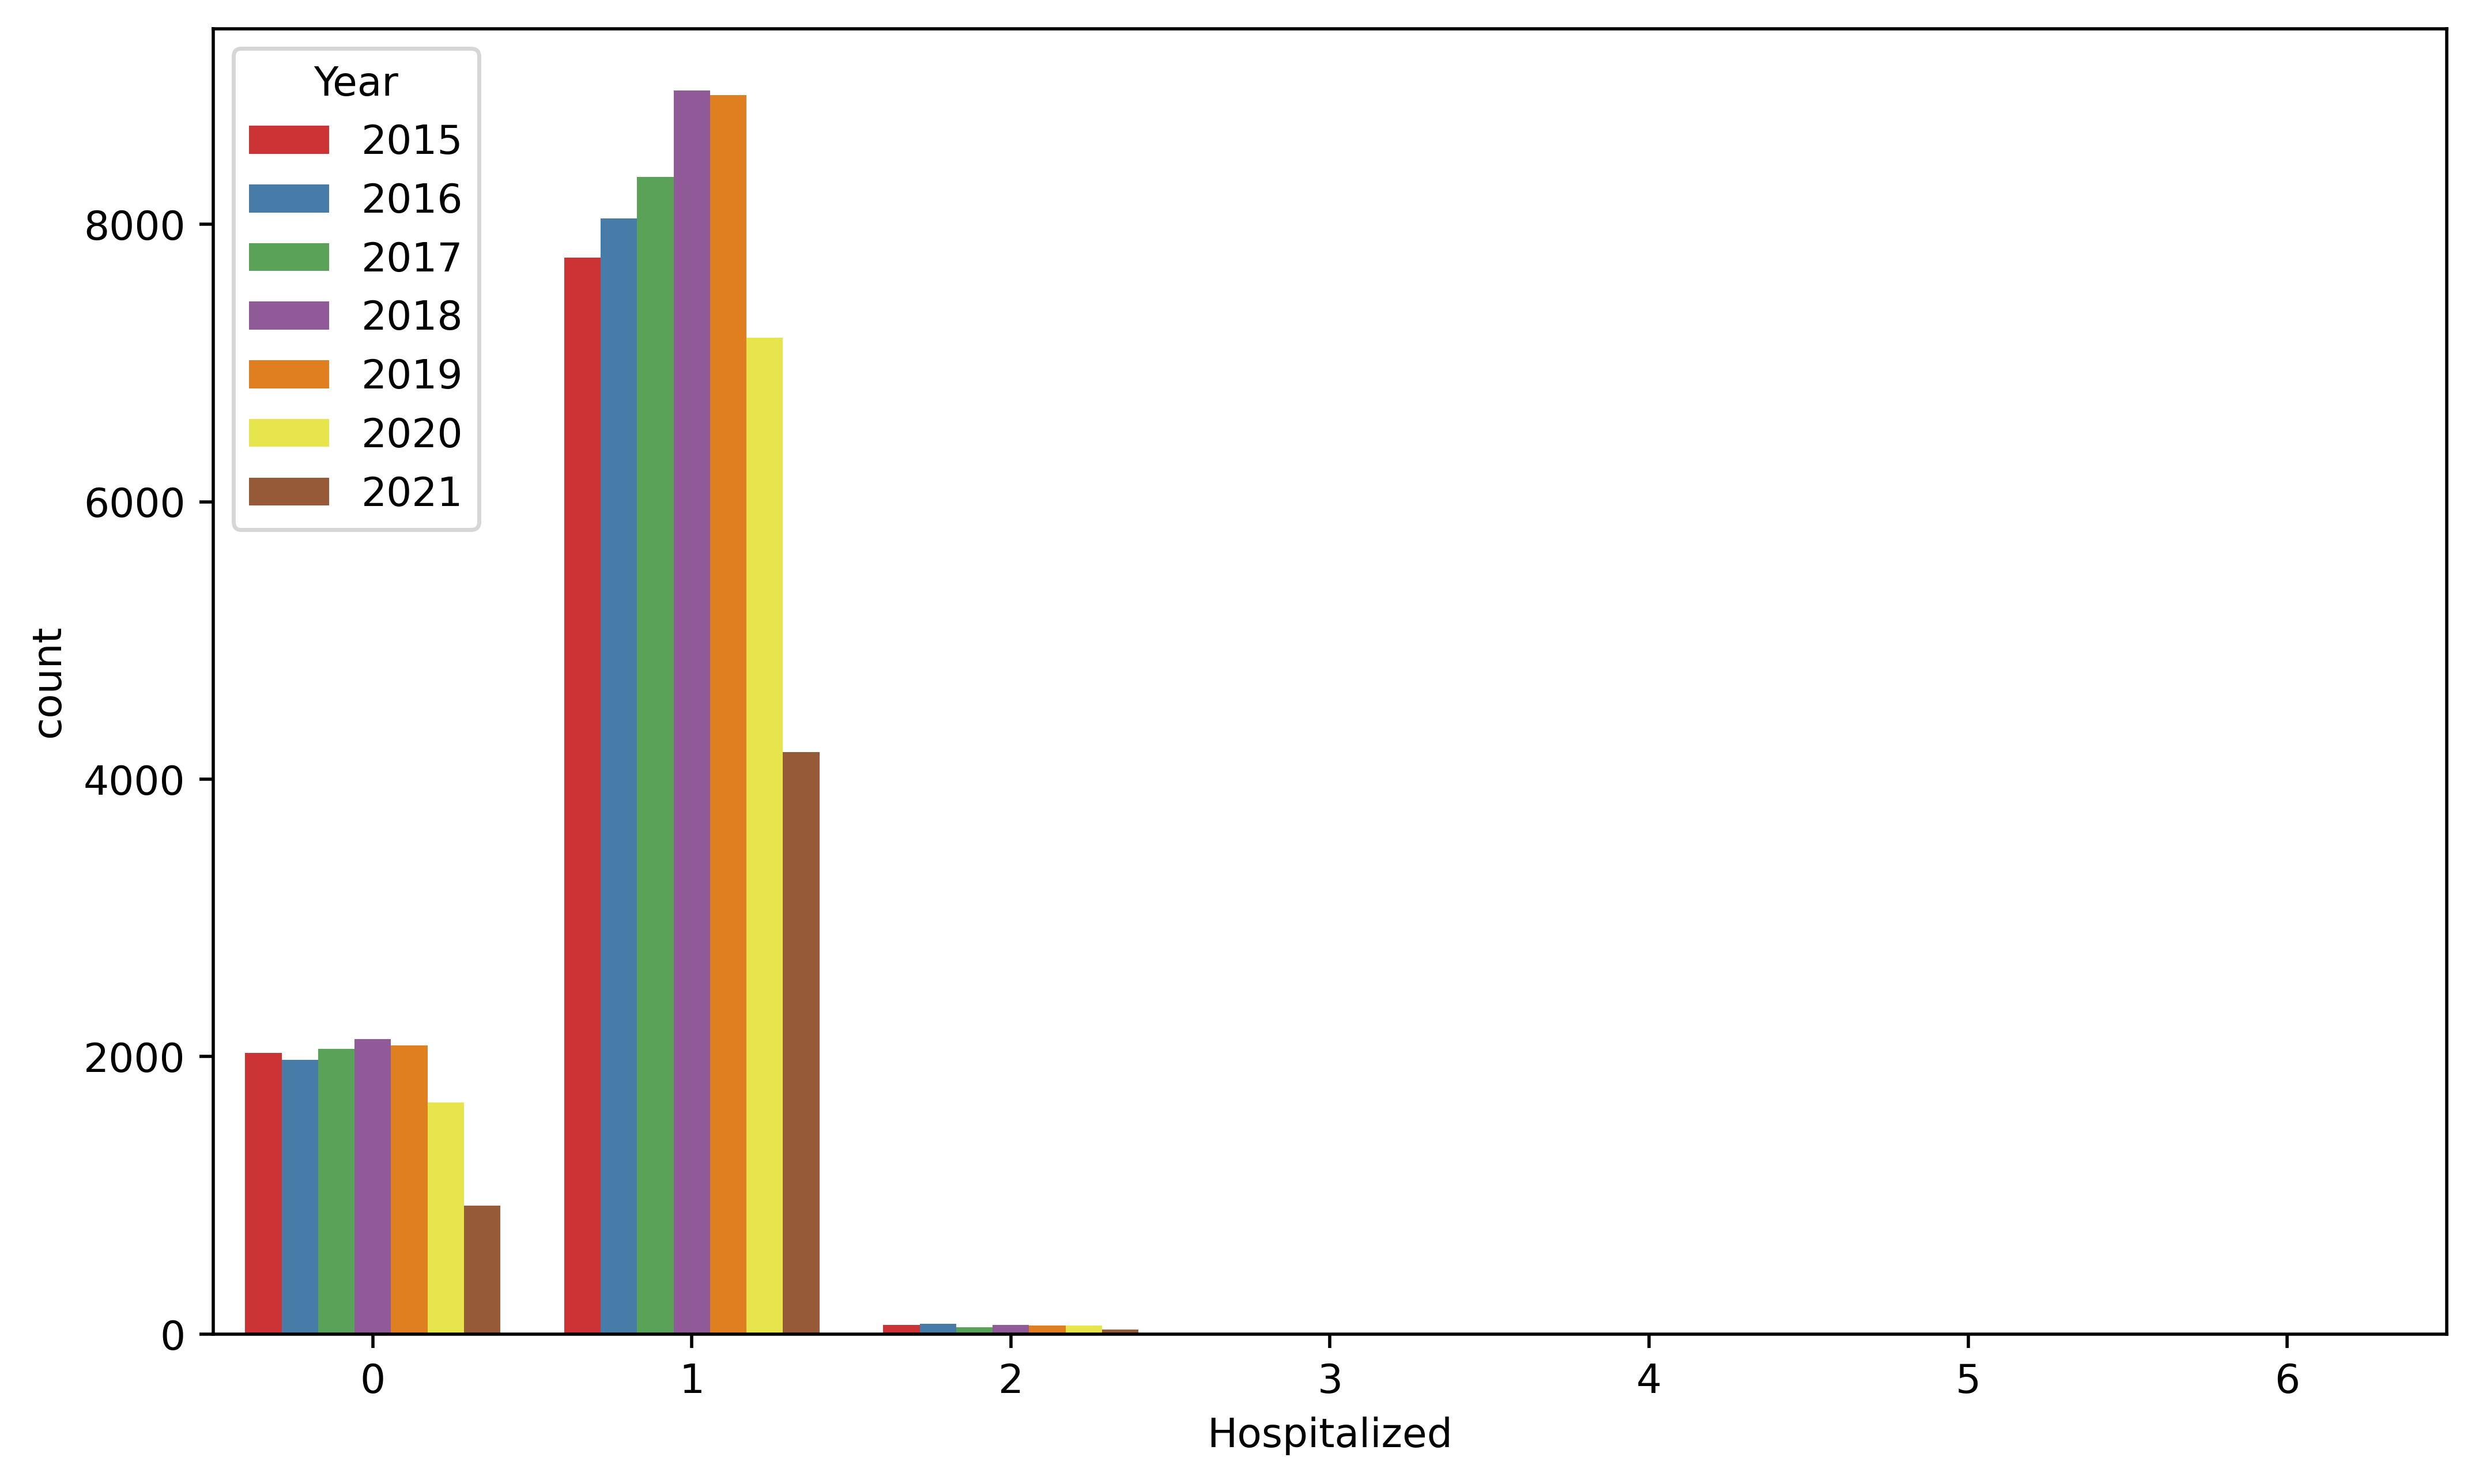

In [25]:
plt.figure(figsize =(10,6), dpi =500)
ax = sns.countplot(x = 'Hospitalized', data = si, hue = 'Year', palette = 'Set1')


From the above visuals, where we have no record of hospitalized victims as a result of severe injury, the year 2021 has the least oocurence of non-hospitalized victims

In [26]:
# checking the occurence of number amputated as a result of a seveere injury
si['Amputation'].value_counts()

0.0    49160
1.0    17520
2.0       14
Name: Amputation, dtype: int64

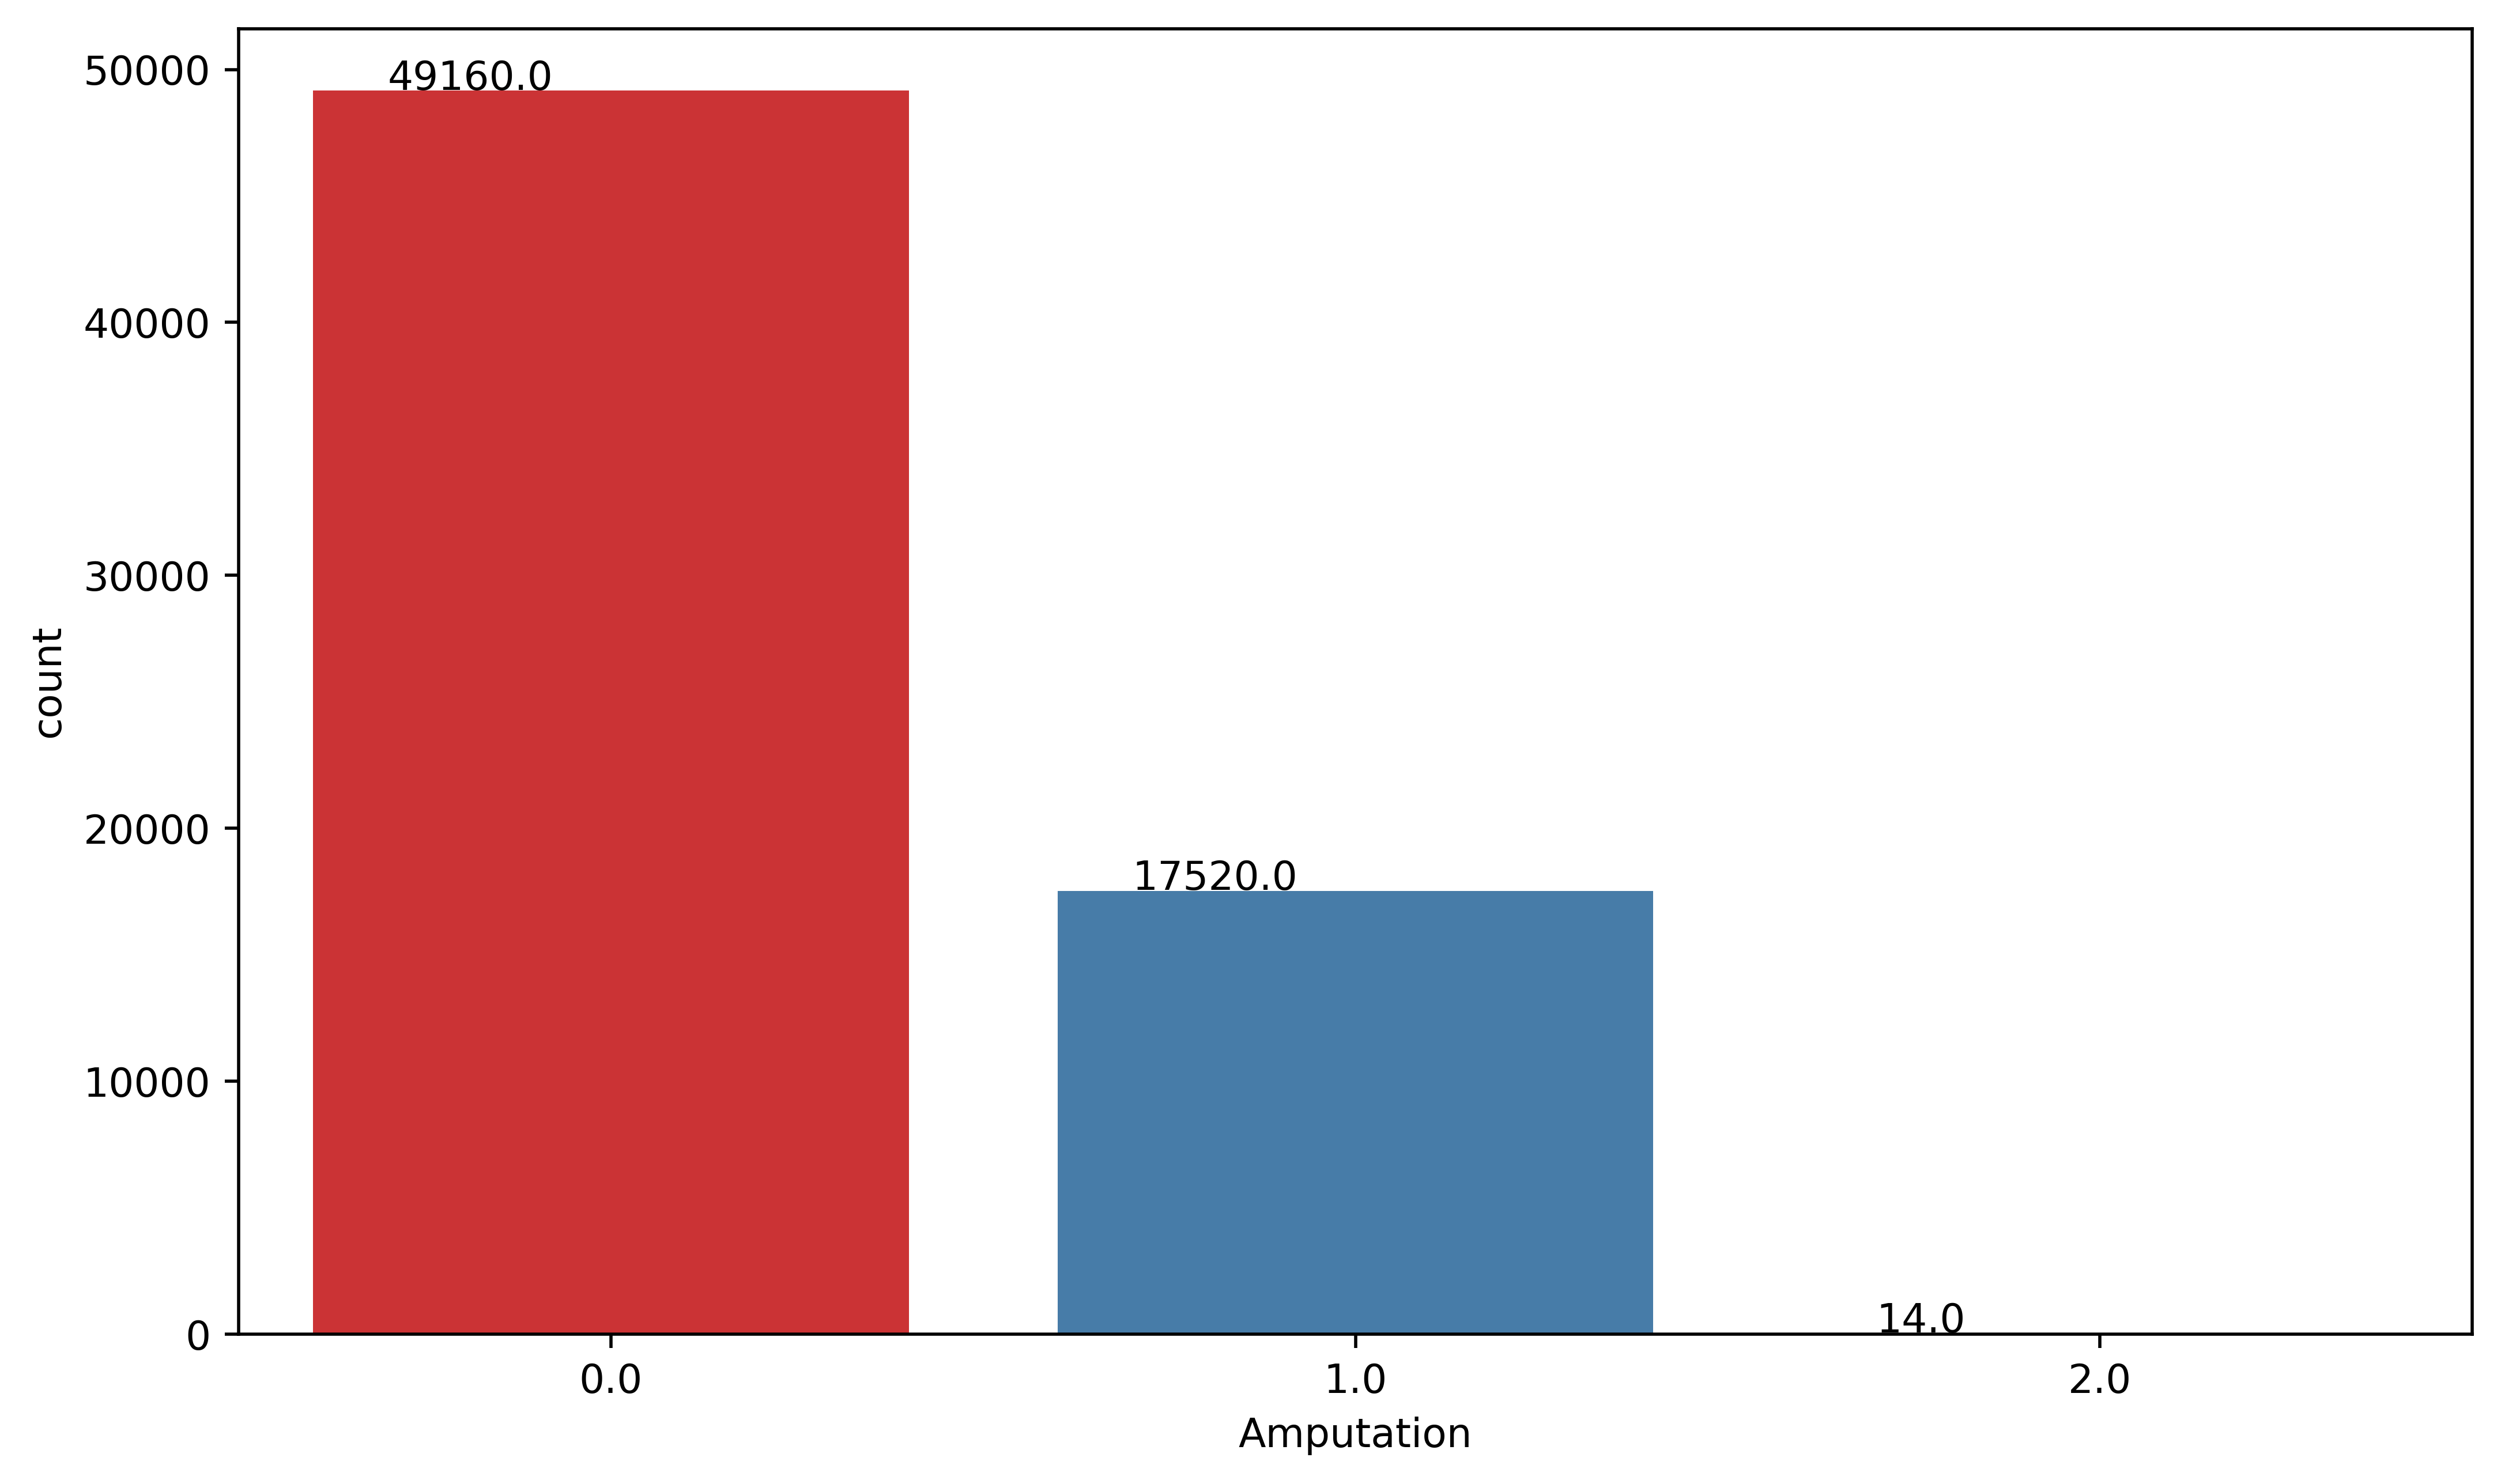

In [27]:
plt.figure(figsize =(10,6), dpi =500)
ax = sns.countplot(x = 'Amputation', data = si, 
              order=si['Amputation'].value_counts(ascending=False).index,  palette = 'Set1');

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

From the above visuals, a severe injury does not always result in the victim been amputated, i.e, non-amputated number of cases has the highest occurence, in cases where there were amputation only 14 times was recorded for an amputation of two. 

<AxesSubplot:xlabel='Amputation', ylabel='count'>

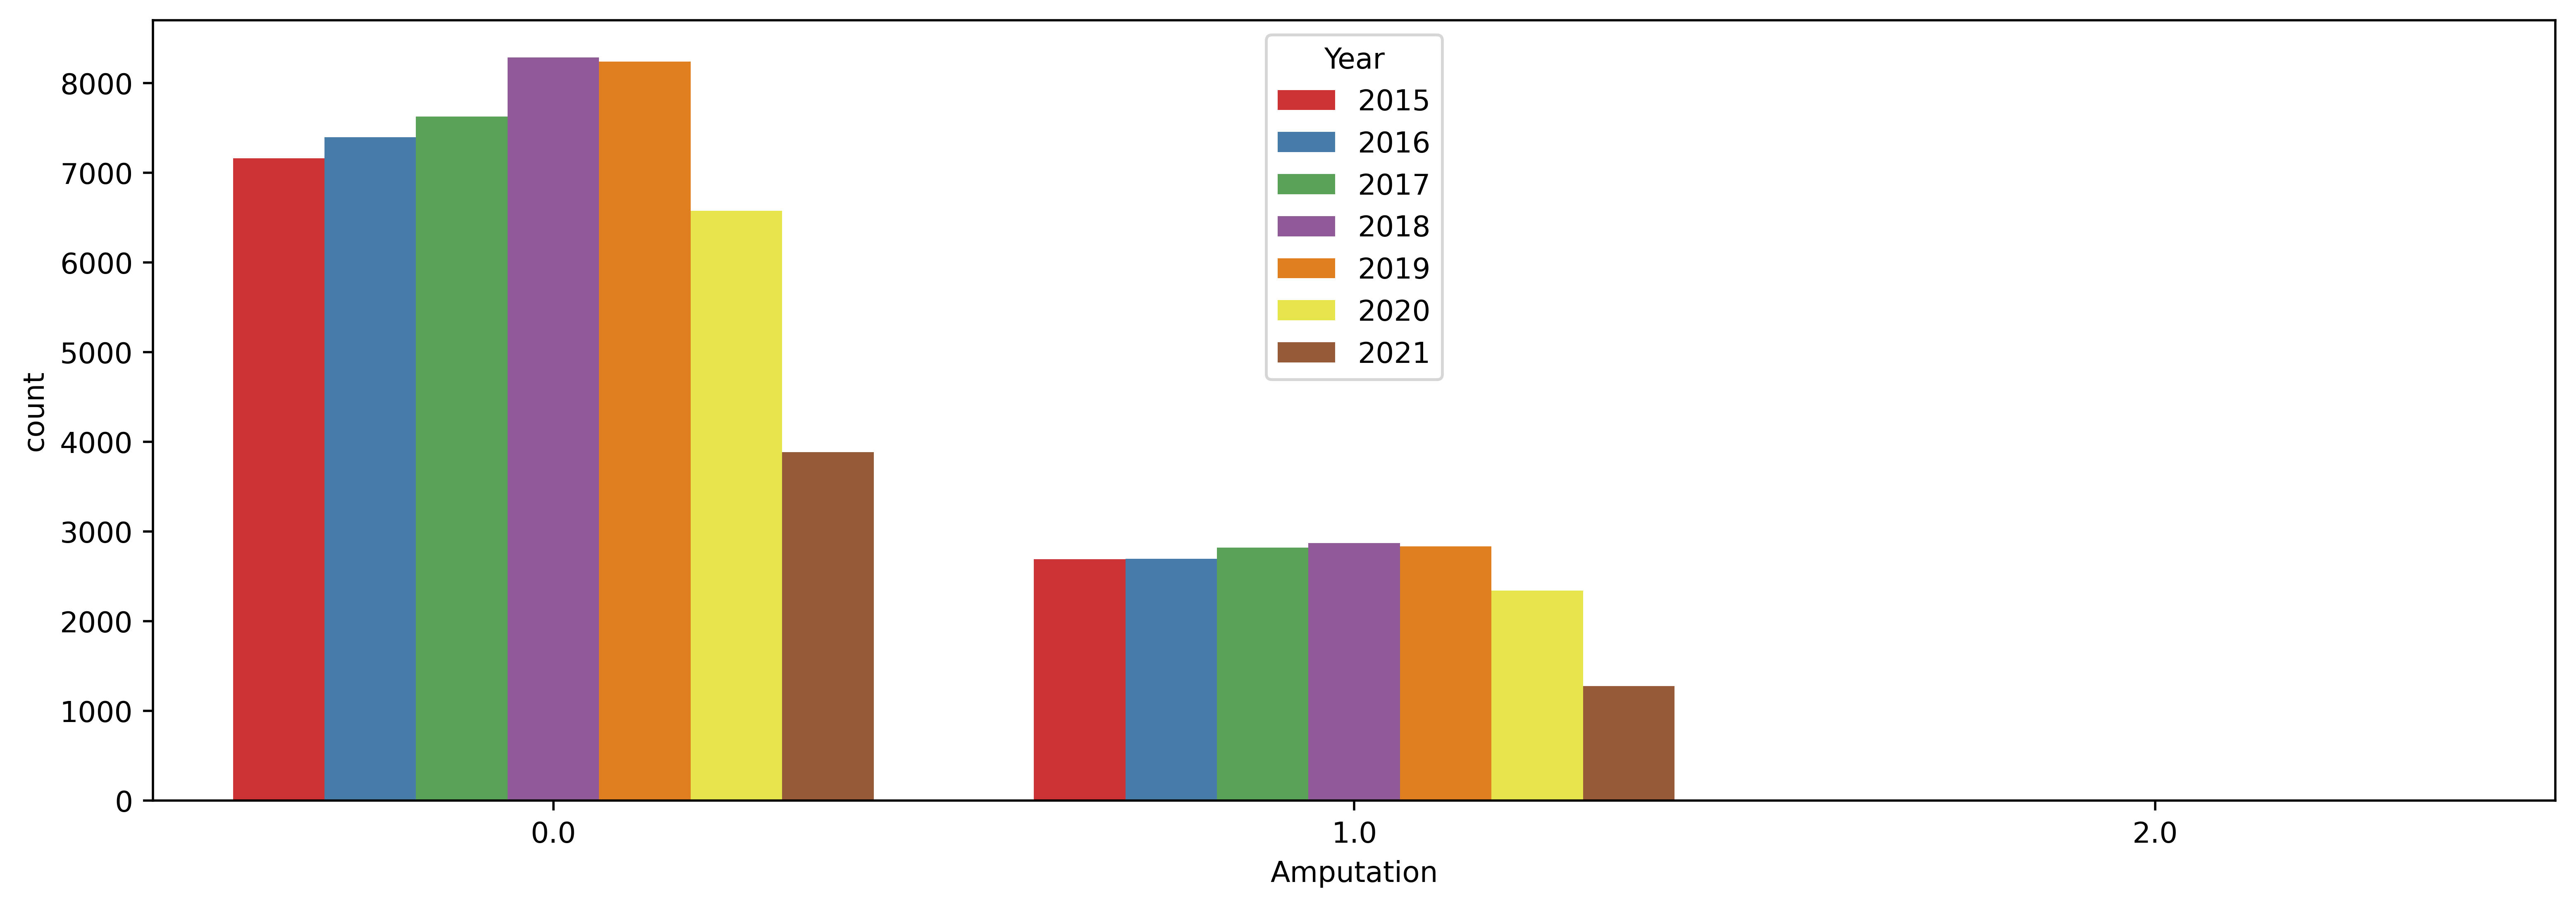

In [28]:
plt.figure(figsize = (15,5), dpi = 500)
sns.countplot(x = 'Amputation', data = si, hue = 'Year', palette = 'Set1')

<AxesSubplot:xlabel='Year', ylabel='Amputation'>

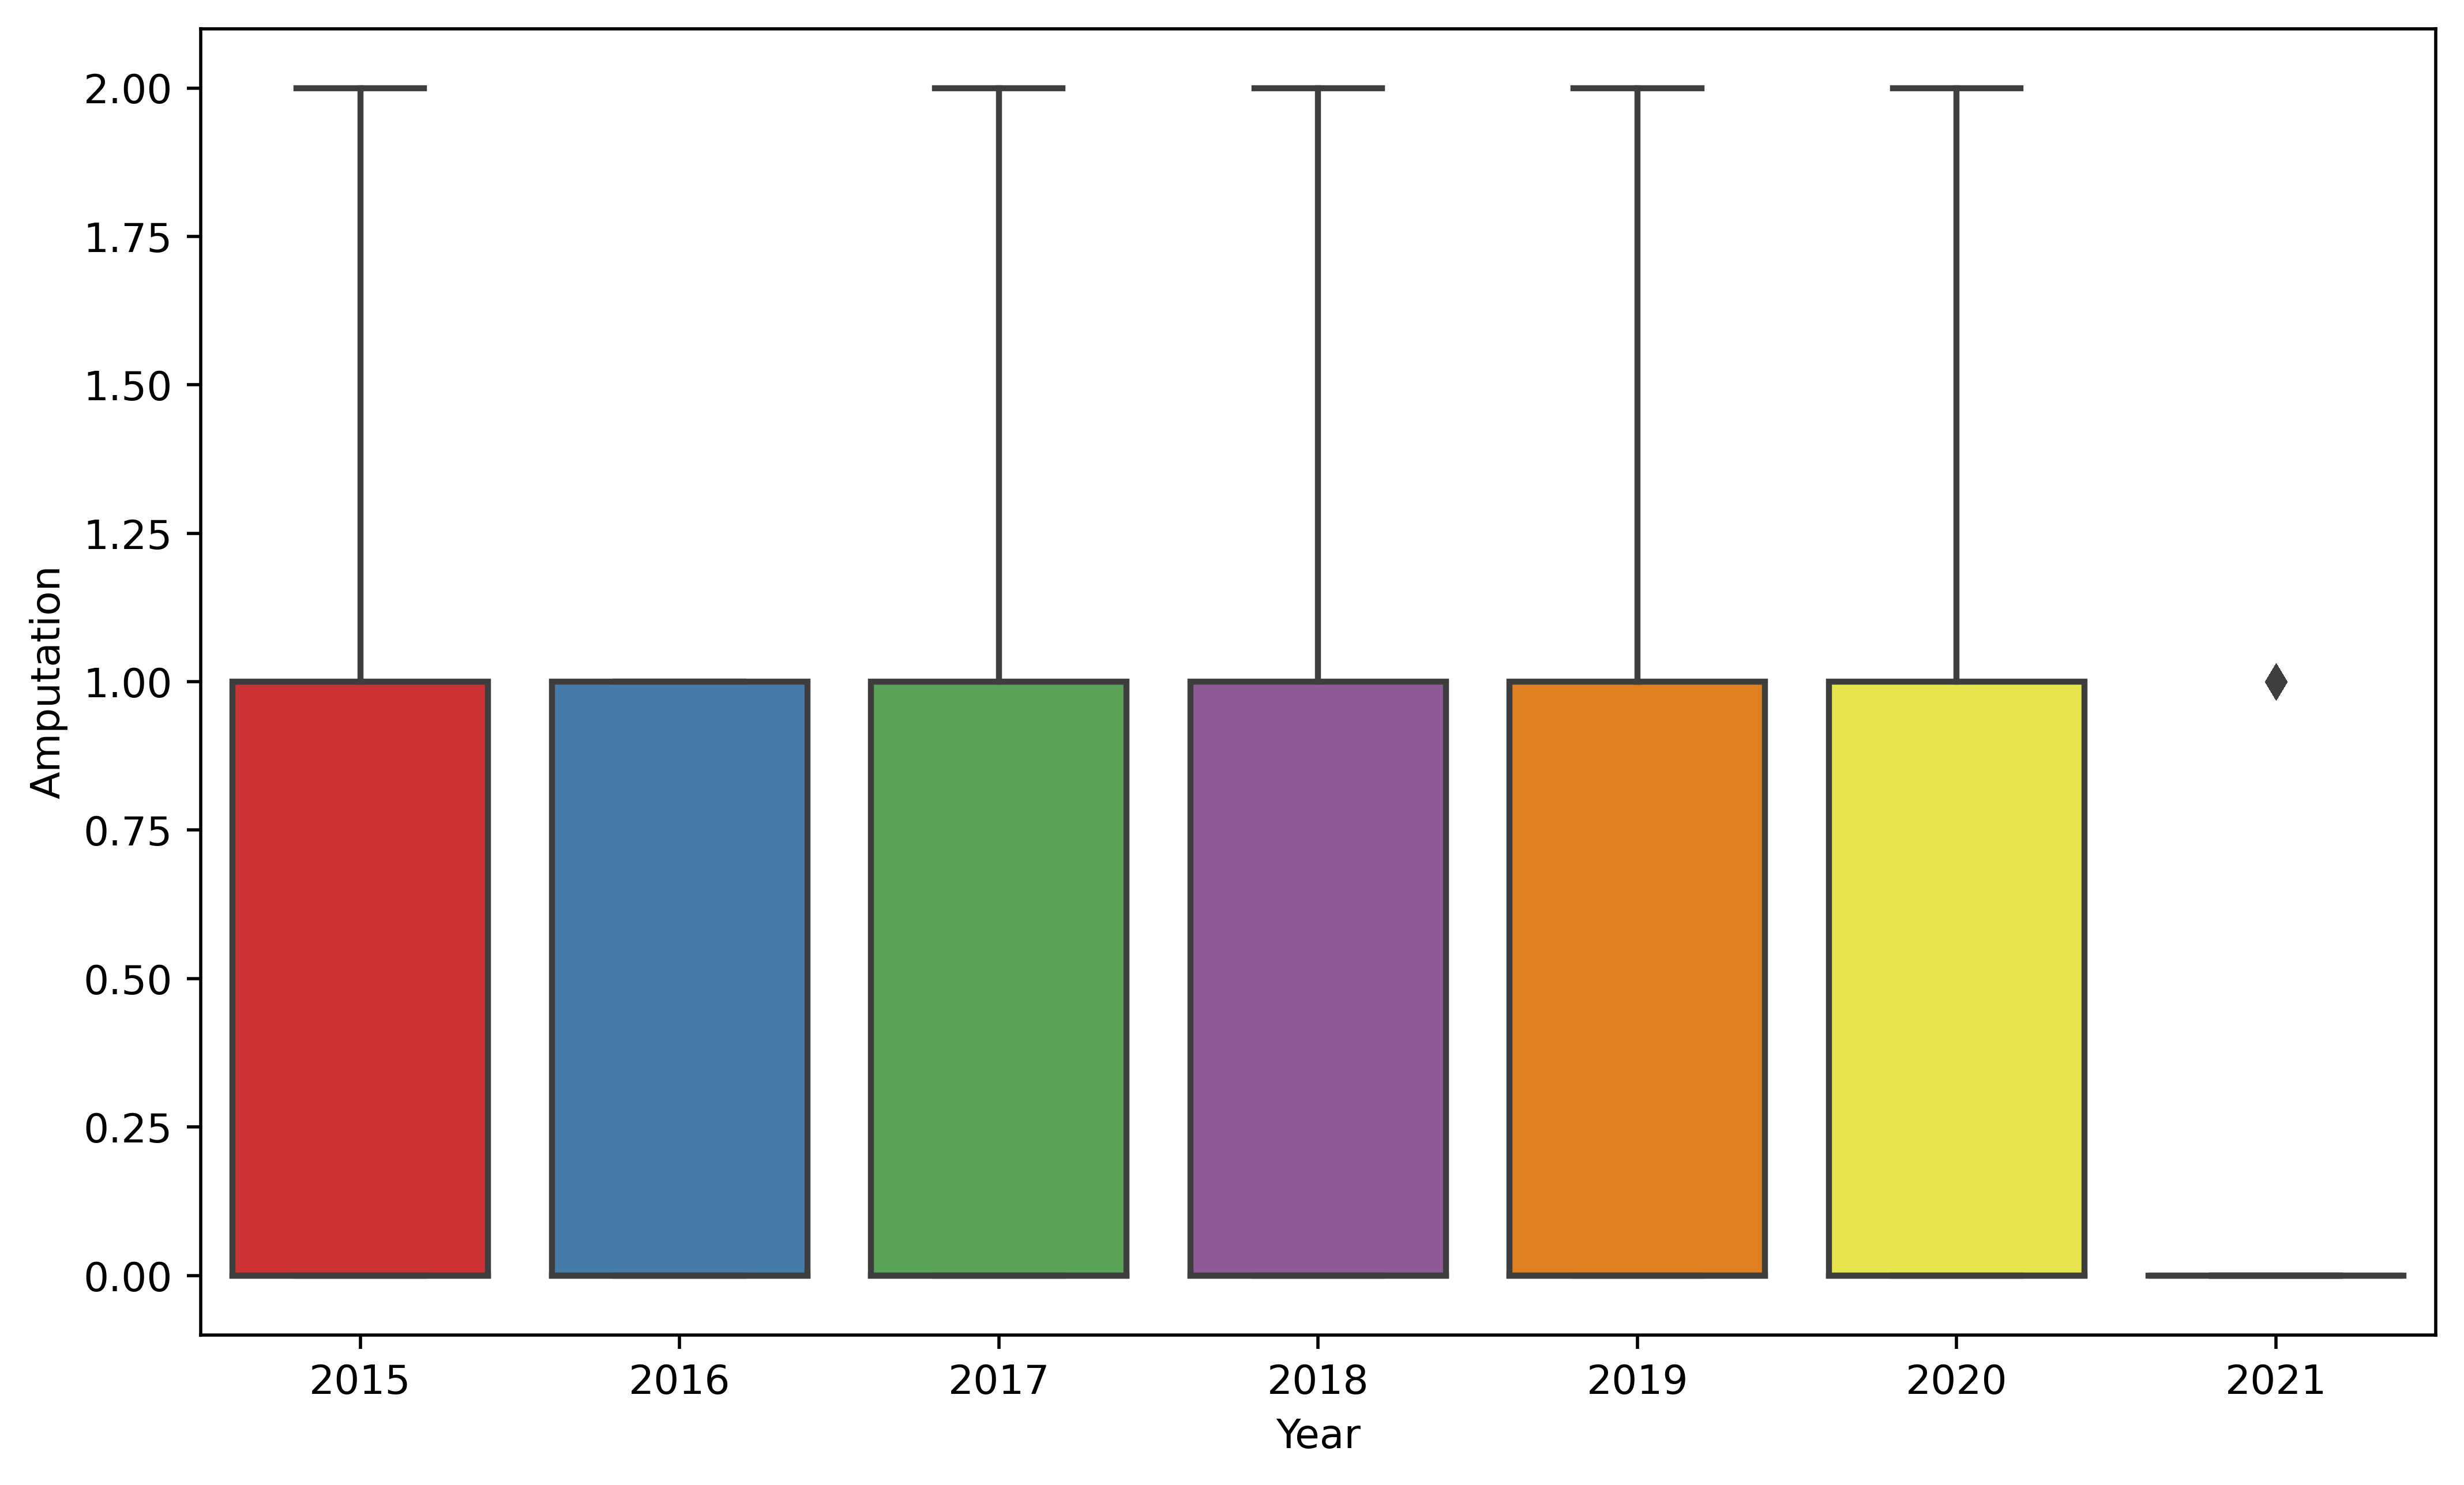

In [29]:
plt.figure(figsize= (10,6), dpi = 500)
sns.boxplot(x = 'Year', y ='Amputation', data = si, palette = 'Set1')

<AxesSubplot:xlabel='Year', ylabel='Hospitalized'>

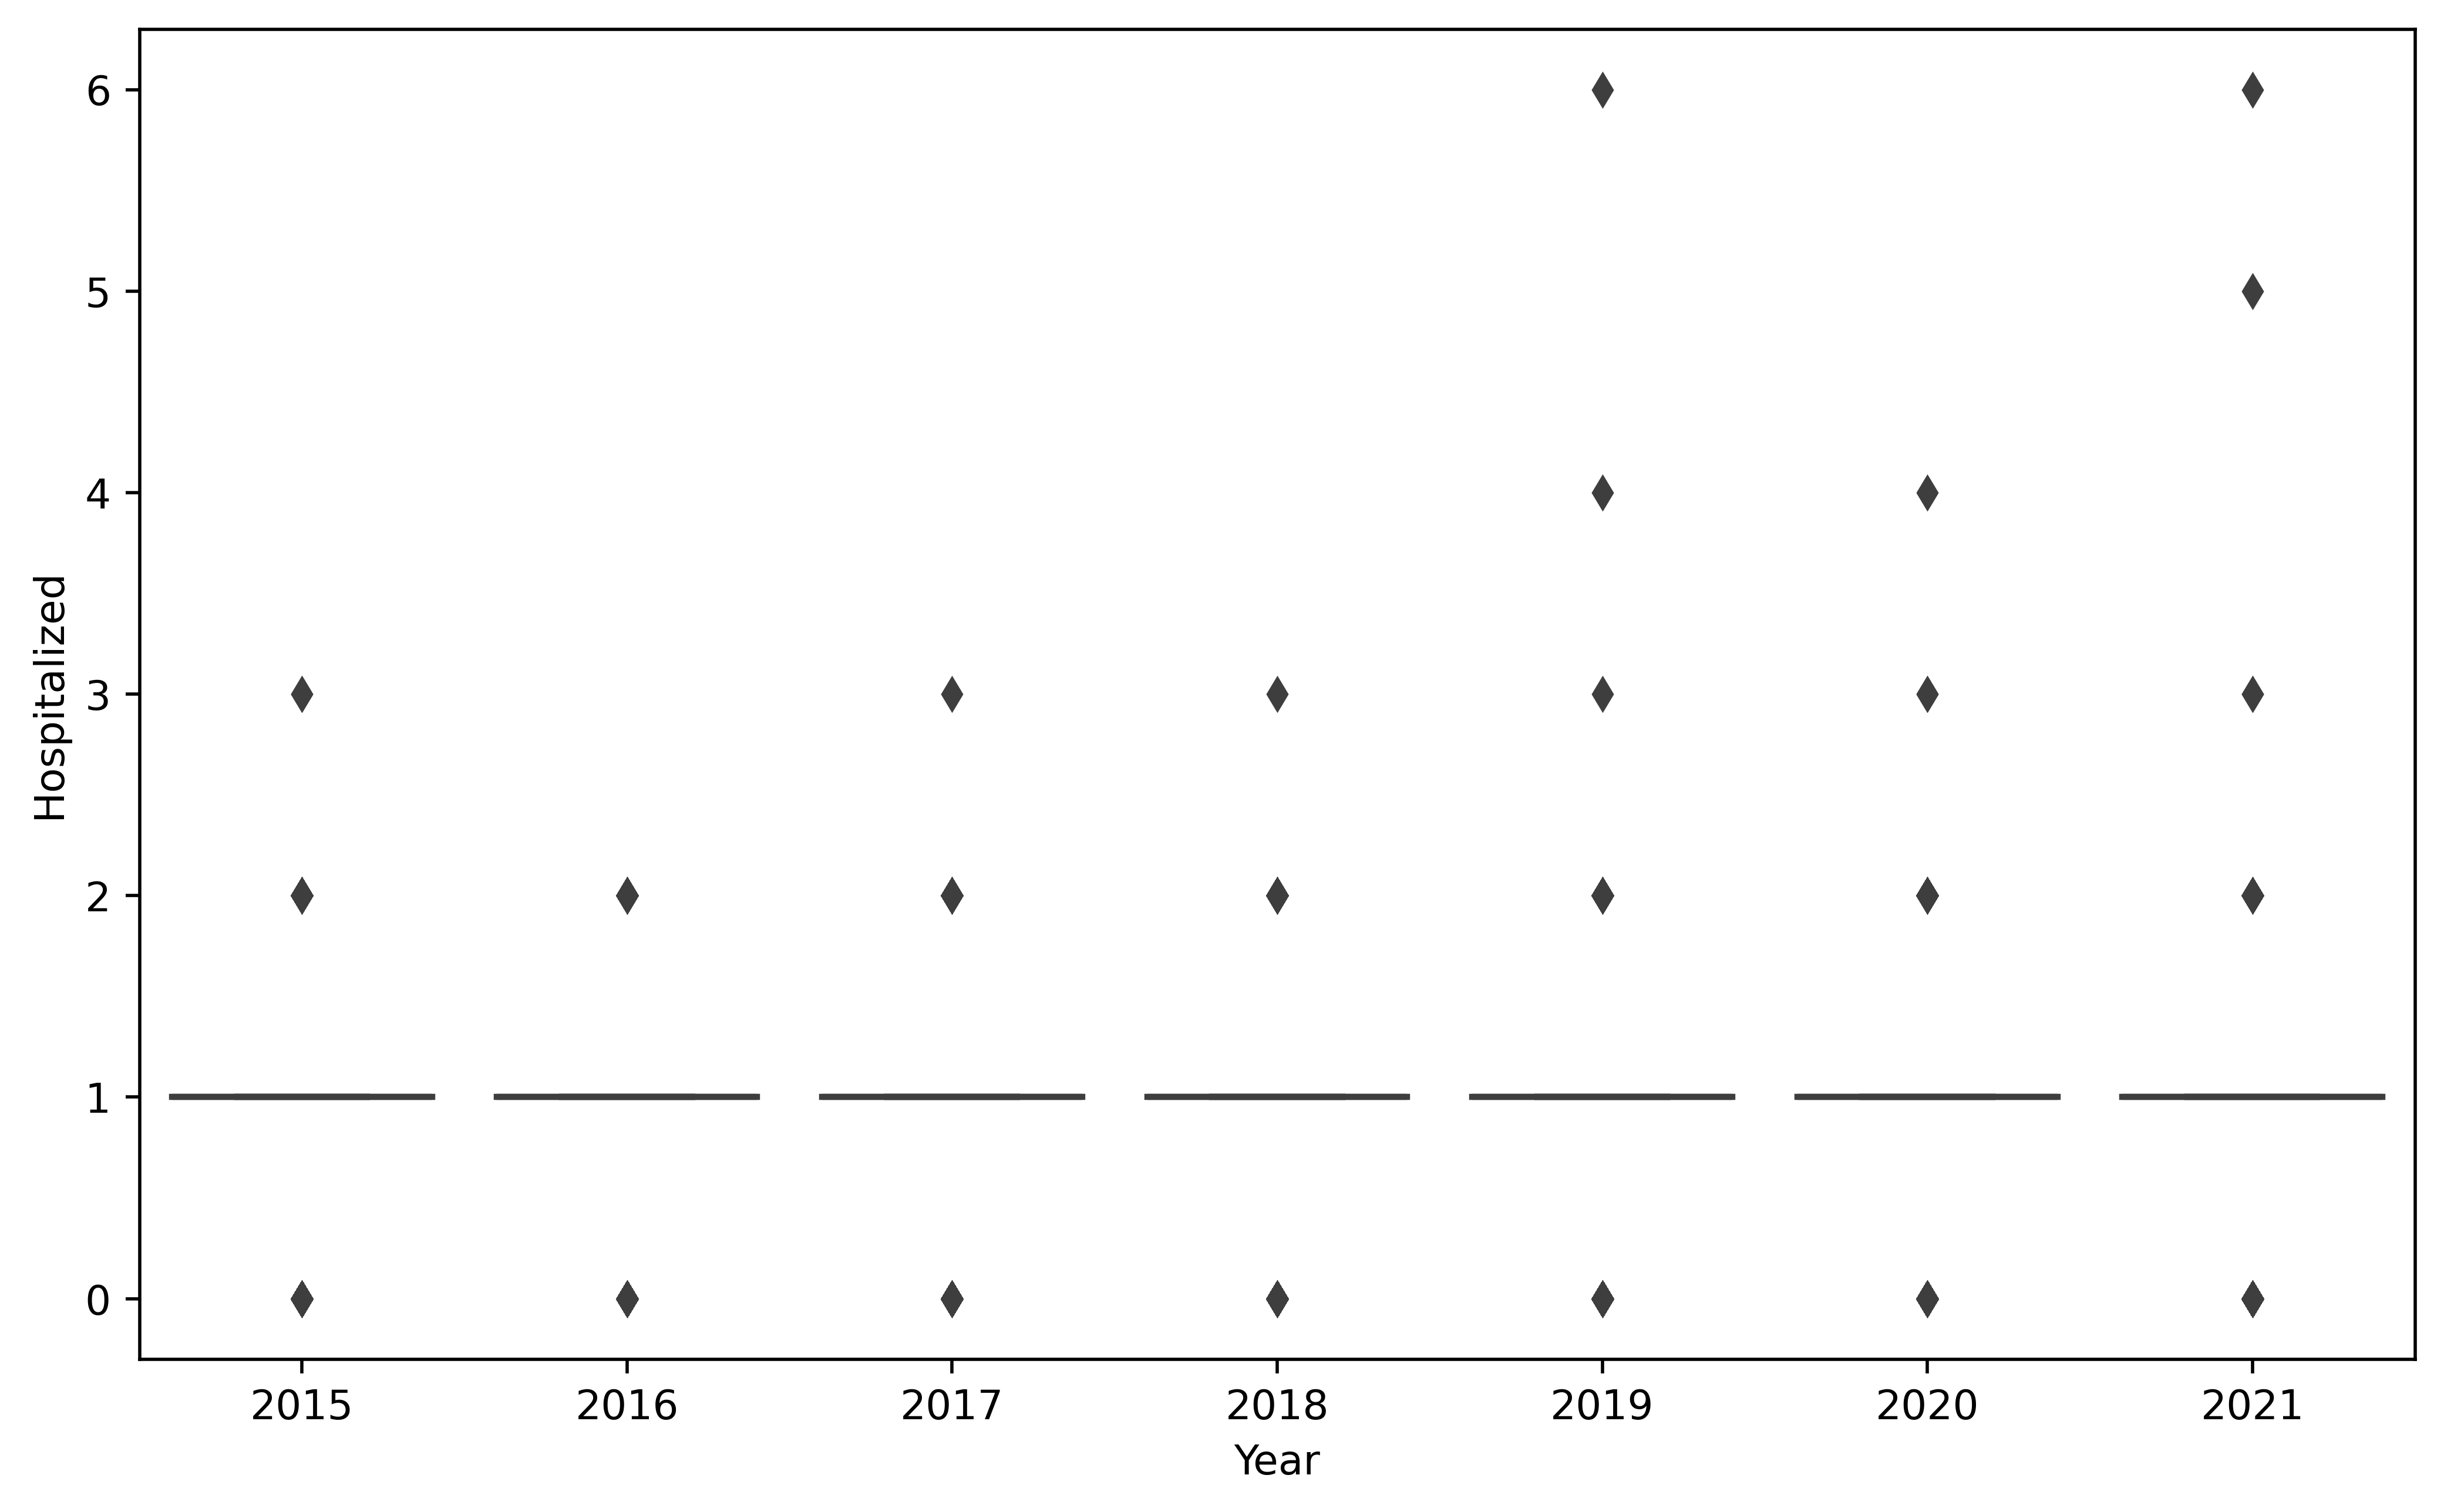

In [30]:
plt.figure(figsize = (10, 6), dpi = 500)
sns.boxplot(x = 'Year', y ='Hospitalized', data = si, palette = 'Set1')

In [31]:
# calling the numerical columns
num_col

['ID',
 'UPA',
 'EventDate',
 'Zip',
 'Latitude',
 'Longitude',
 'Hospitalized',
 'Amputation',
 'Nature',
 'Partof Body',
 'Event',
 'Source',
 'Year']

<AxesSubplot:>

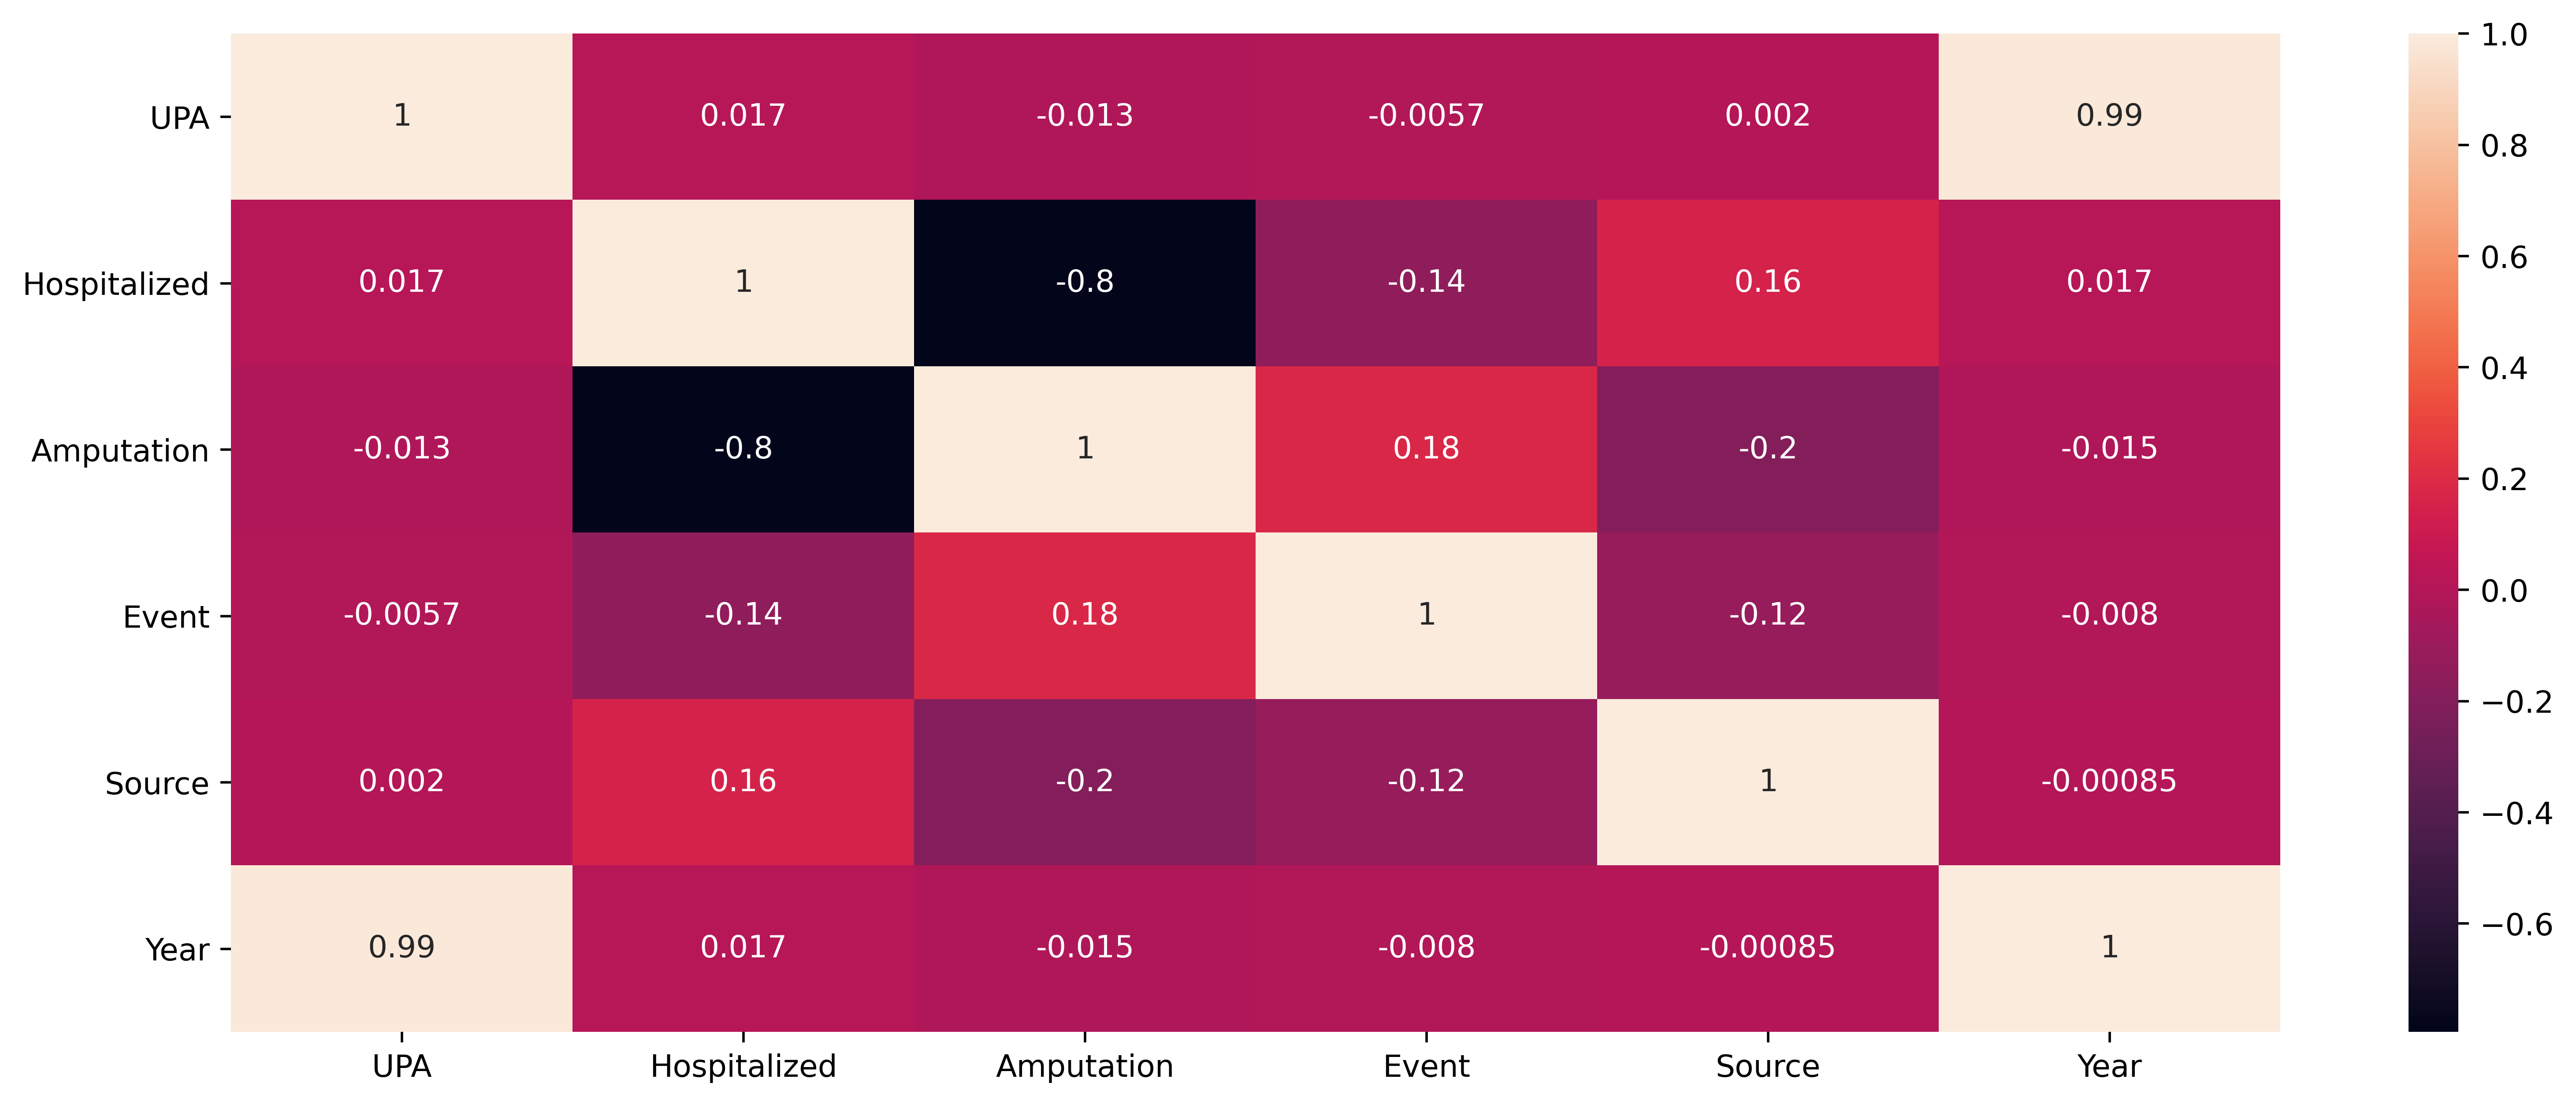

In [32]:
# plotting the heat map to show the correlation
plt.figure(figsize = (15,6), dpi = 500)
sns.heatmap(si.corr(), annot = True)

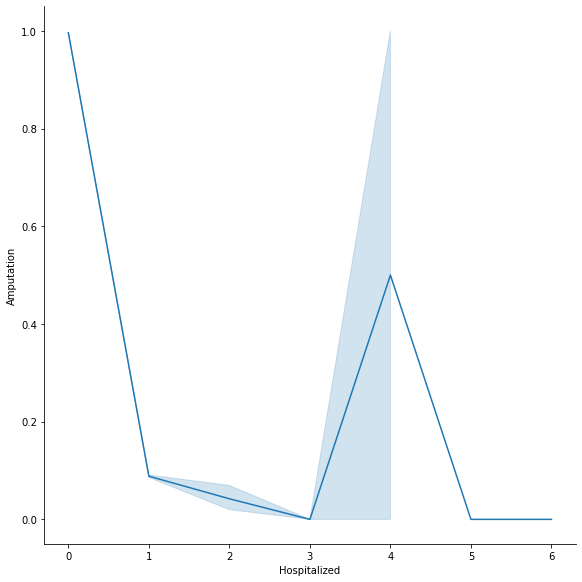

In [33]:
# plotting the relationship between Hospitalized and Amputation on a line graph
sns.relplot(data=si, x="Hospitalized", y="Amputation", kind="line", height=8, aspect=1)
    

<Figure size 7000x4200 with 0 Axes>

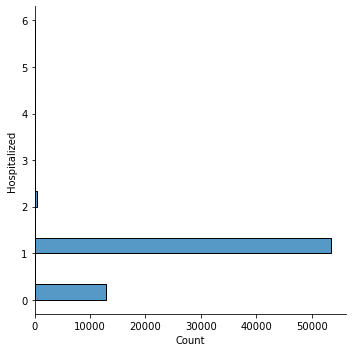

In [43]:
# plotting the distribution of Hospitalized victims
plt.figure(figsize = (10,6), dpi = 700)
sns.displot(y ='Hospitalized', data = si, )


<Figure size 7000x4200 with 0 Axes>

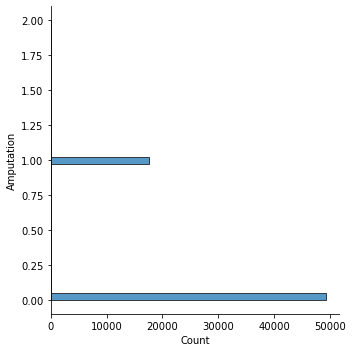

In [35]:
# plotting the distribution of Amputation
plt.figure(figsize = (10,6), dpi = 700)
sns.displot(y = 'Amputation', data = si)

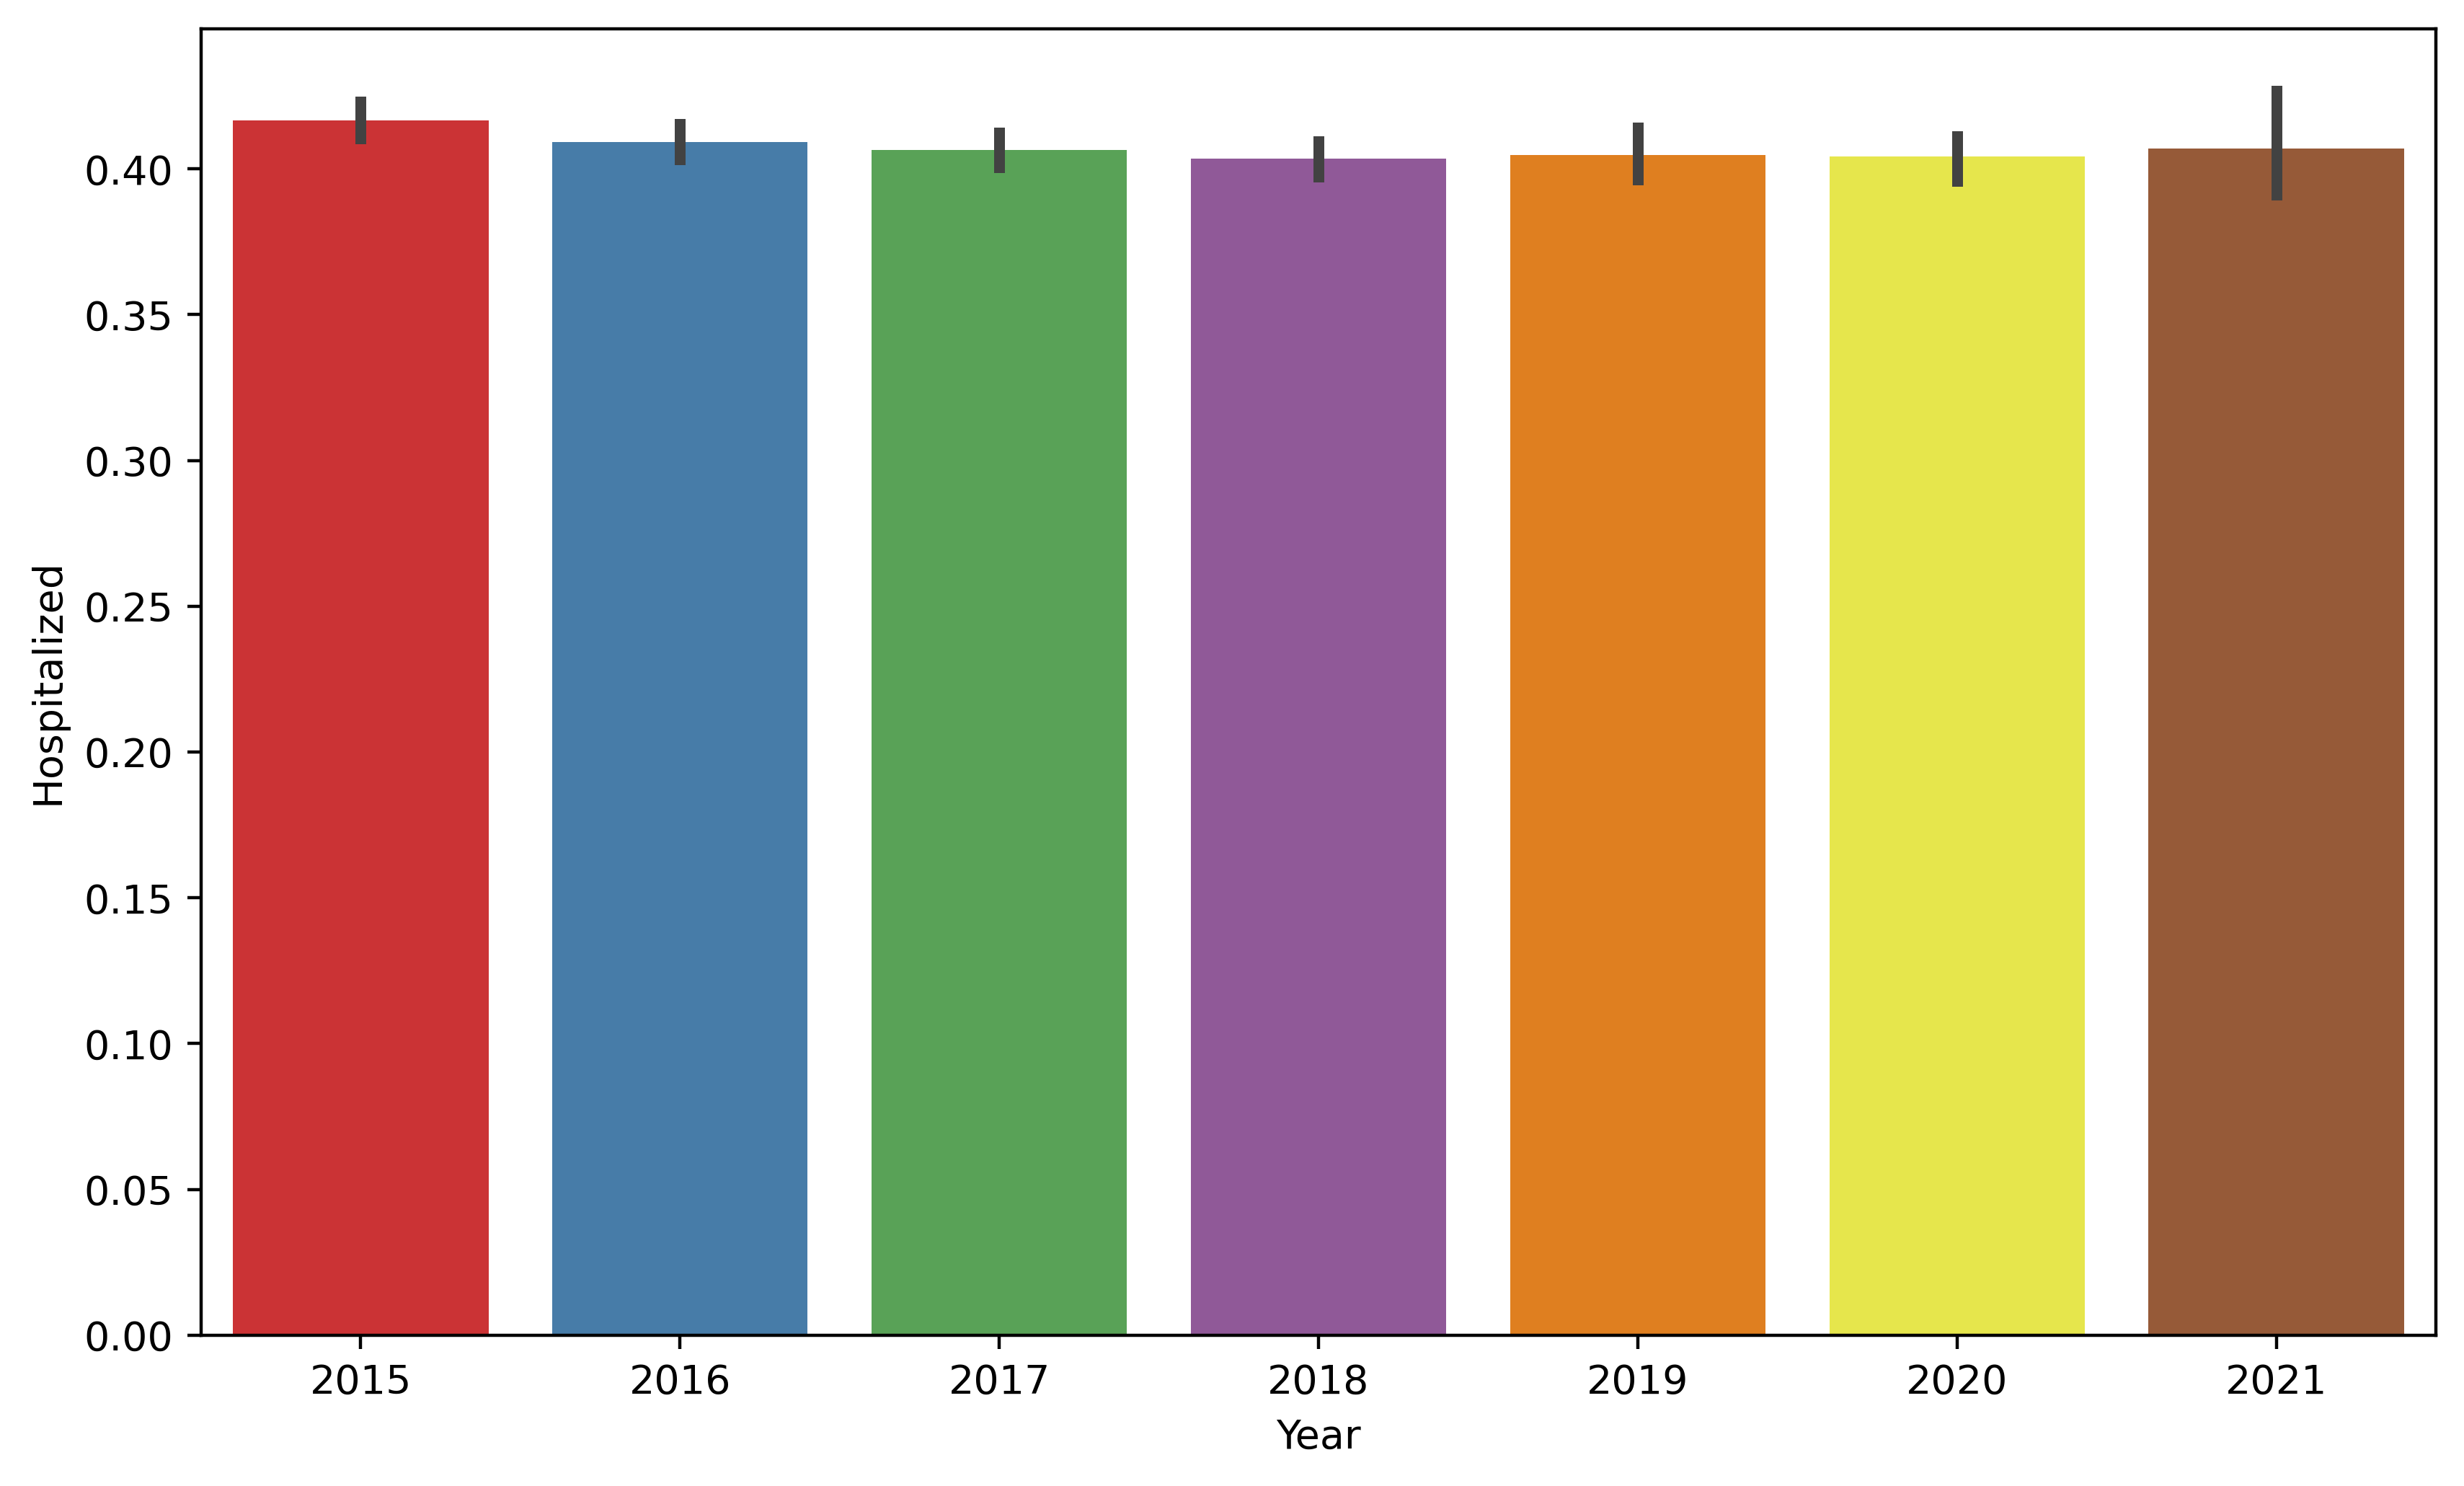

In [37]:
# plotting the standard deviation of Hospitalized victims yearly 
plt.figure(figsize = (10,6), dpi = 400)
ax = sns.barplot(x='Year', y='Hospitalized', data=si, palette = 'Set1',  estimator=np.std)



<AxesSubplot:xlabel='Year', ylabel='Amputation'>

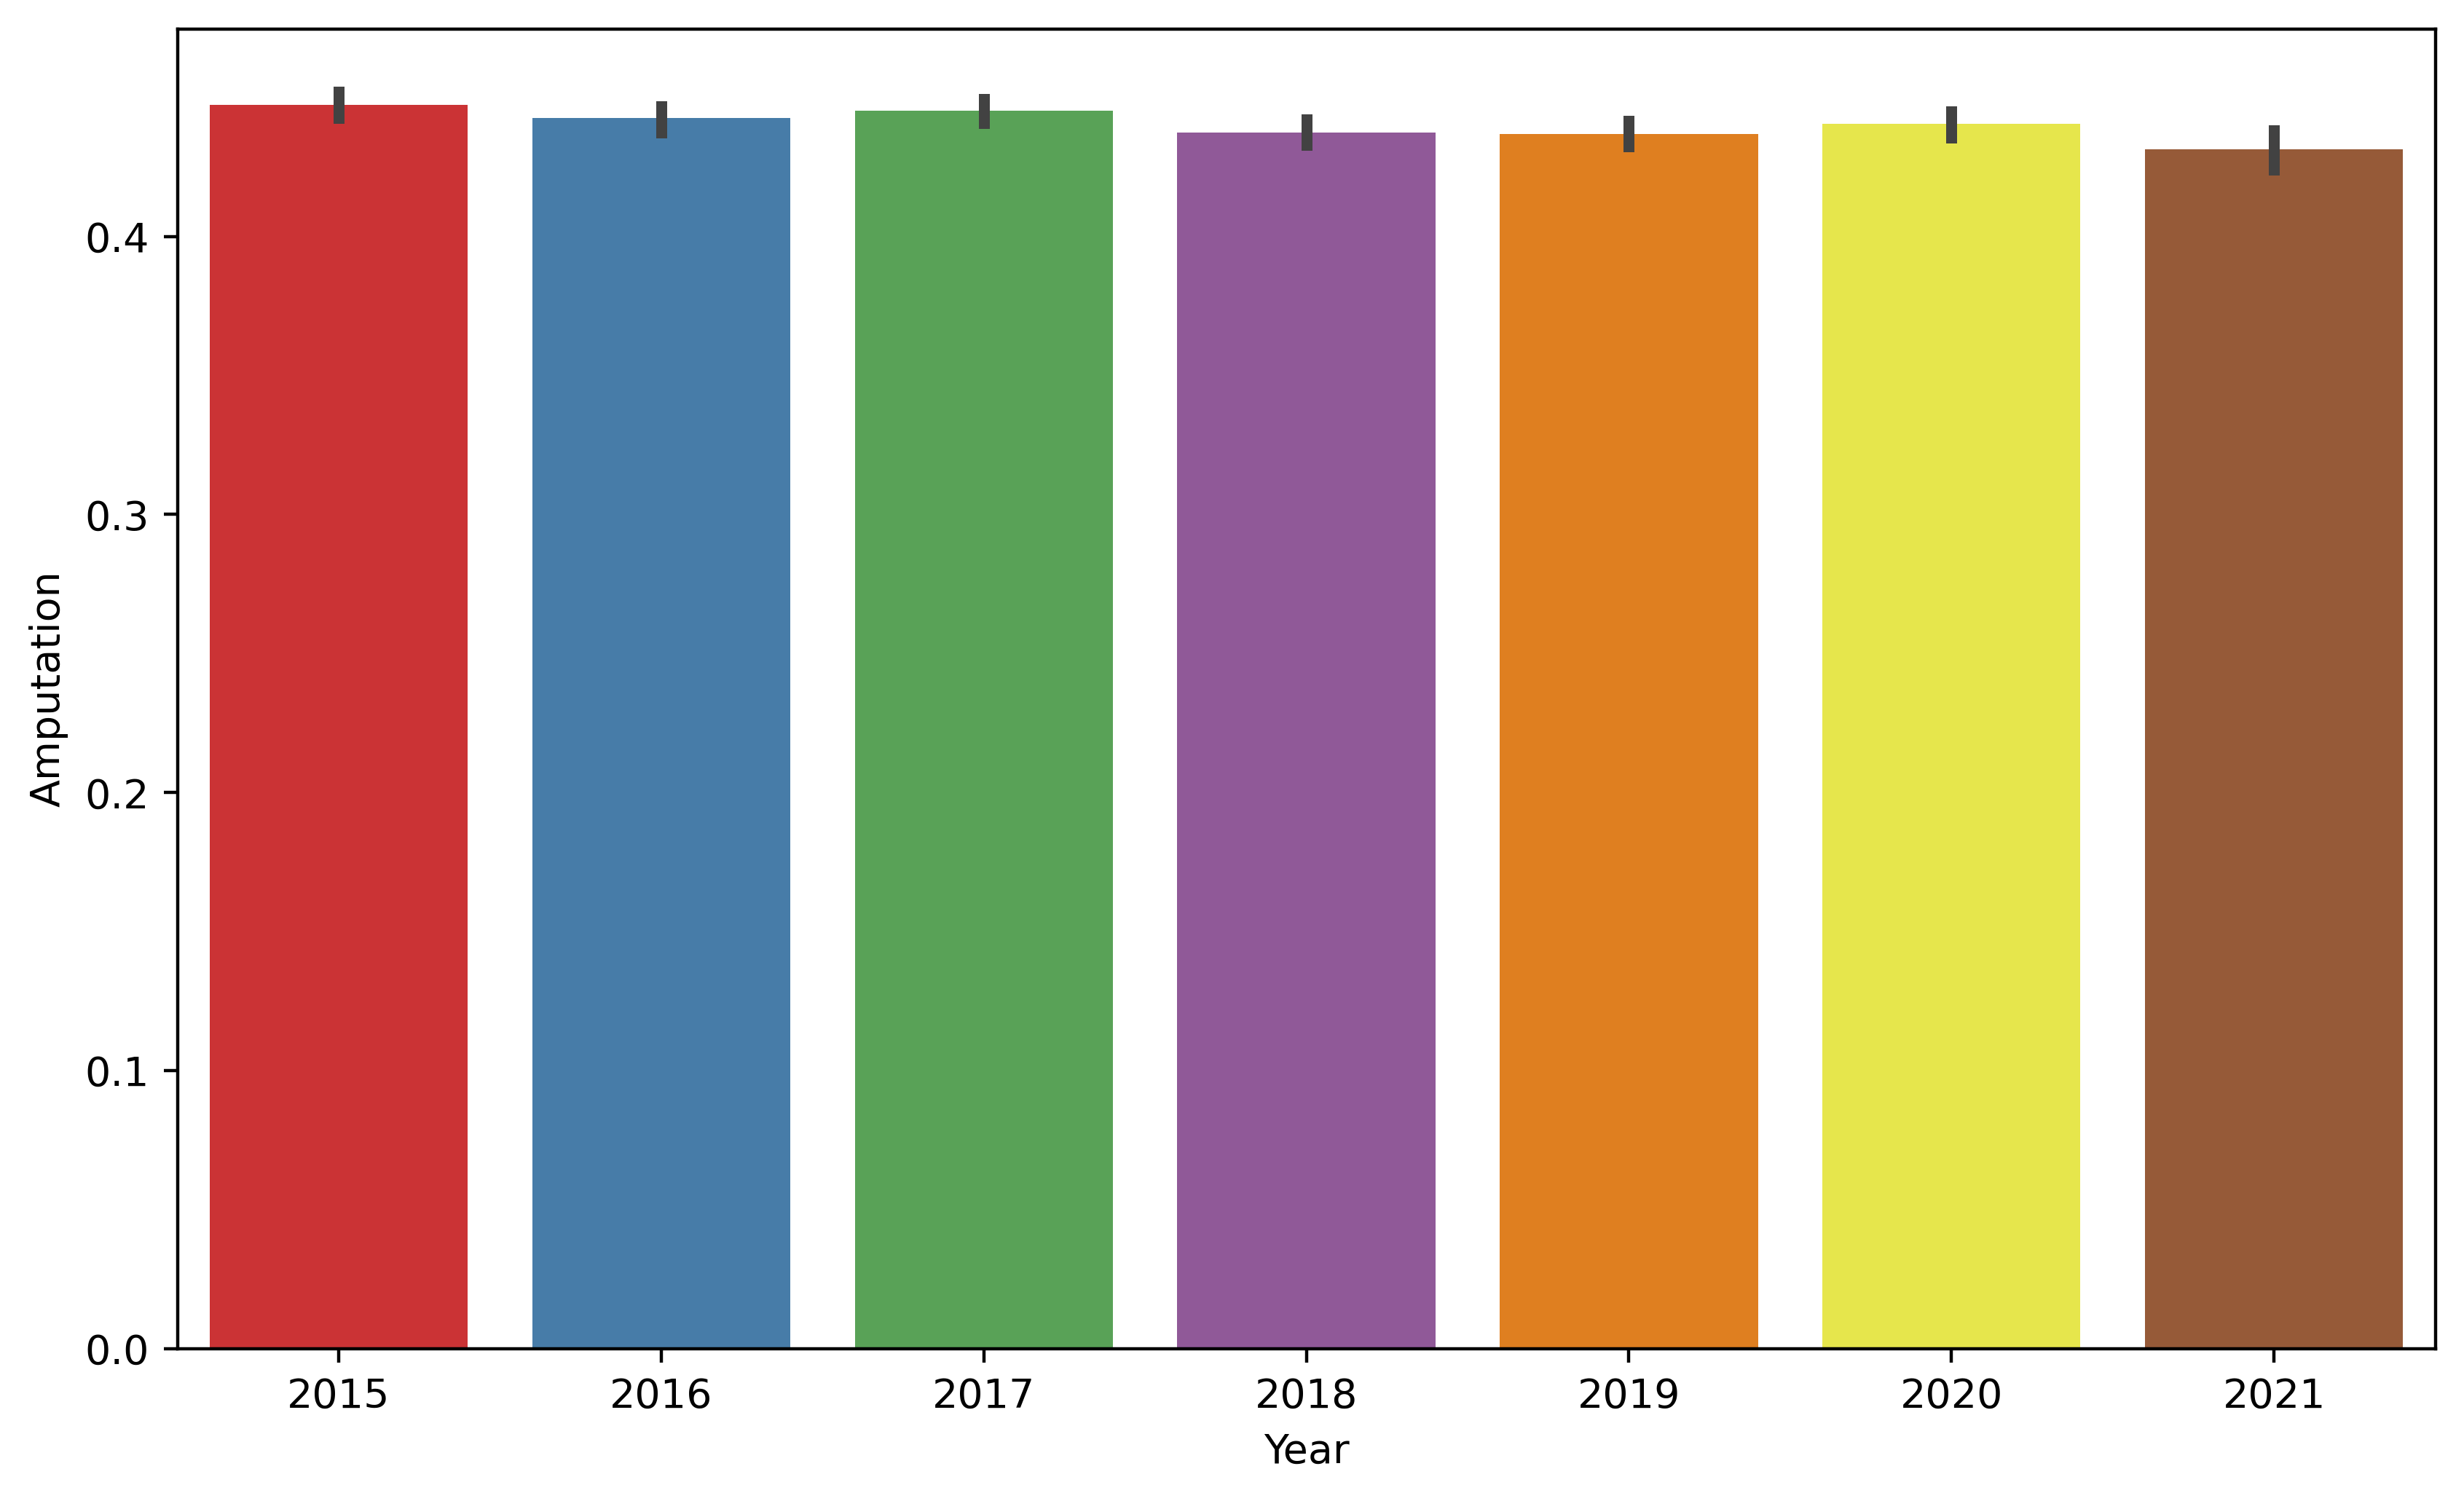

In [38]:
# plotting the standard deviation of Amputation yearly
plt.figure(figsize = (10,6), dpi = 400)
sns.barplot(x='Year', y='Amputation', data=si, palette = 'Set1', estimator=np.std)